#Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## Objective
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset

###Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Making the datafram from the dataset file
airlines = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
airlines.info()
# Here we can see
# There are total 12 columns
# All the 12 columns has int64 dtype
# All the 12 columns has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines.describe()
# Here we can see there are many outliers presents in some of the columns
# cc' columns and Award column has very low standard veriations

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [6]:
airlines.duplicated().sum()
# No duplicate data present

0

In [7]:
airlines.isna().sum()
# No missing data present

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
# We dont need ID# column for model building
airlines_data = airlines.iloc[:,1:]
airlines_data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

<Axes: >

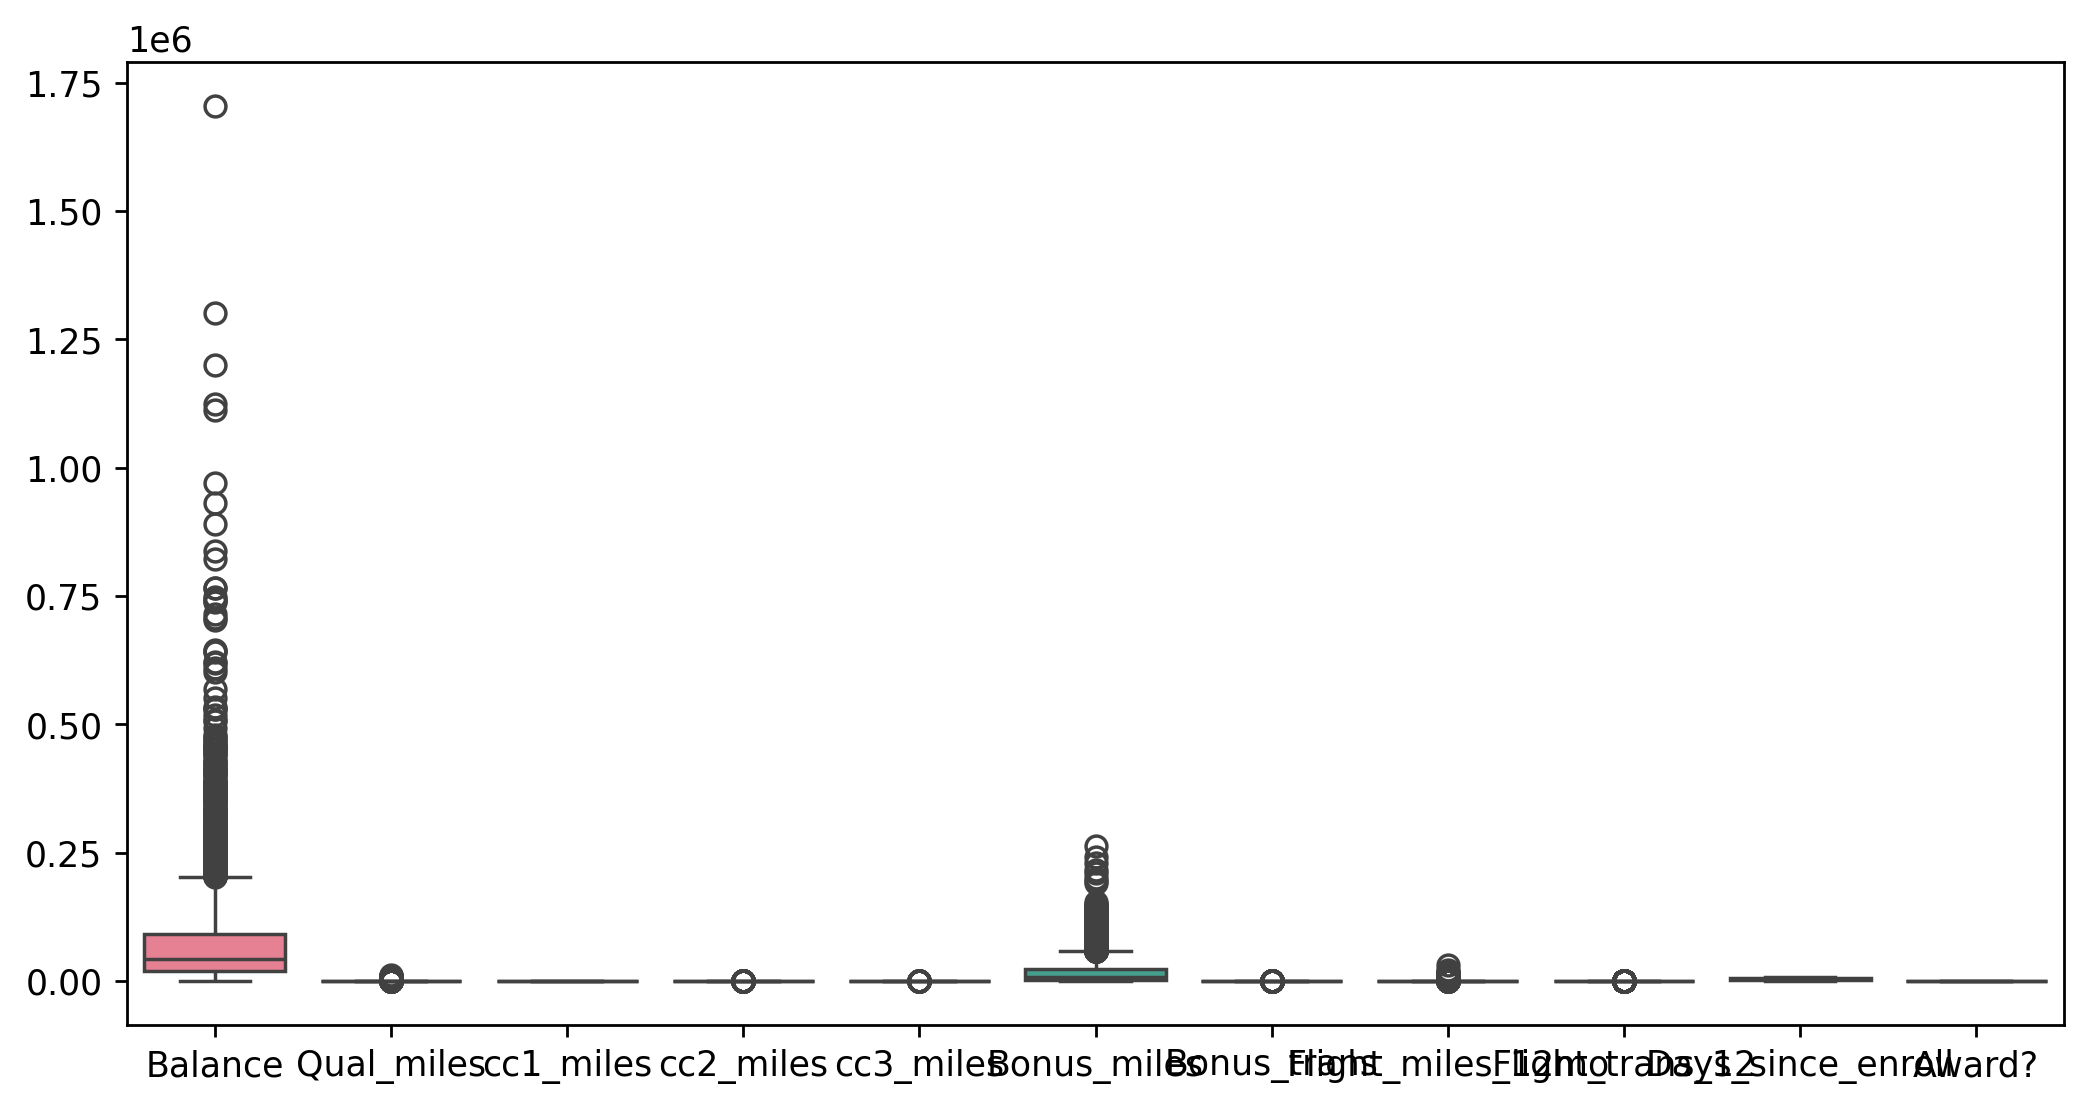

In [9]:
sns.boxplot(airlines_data)
# 9 out of 11 columns has outliers
# Balance column has maximum number of outliers

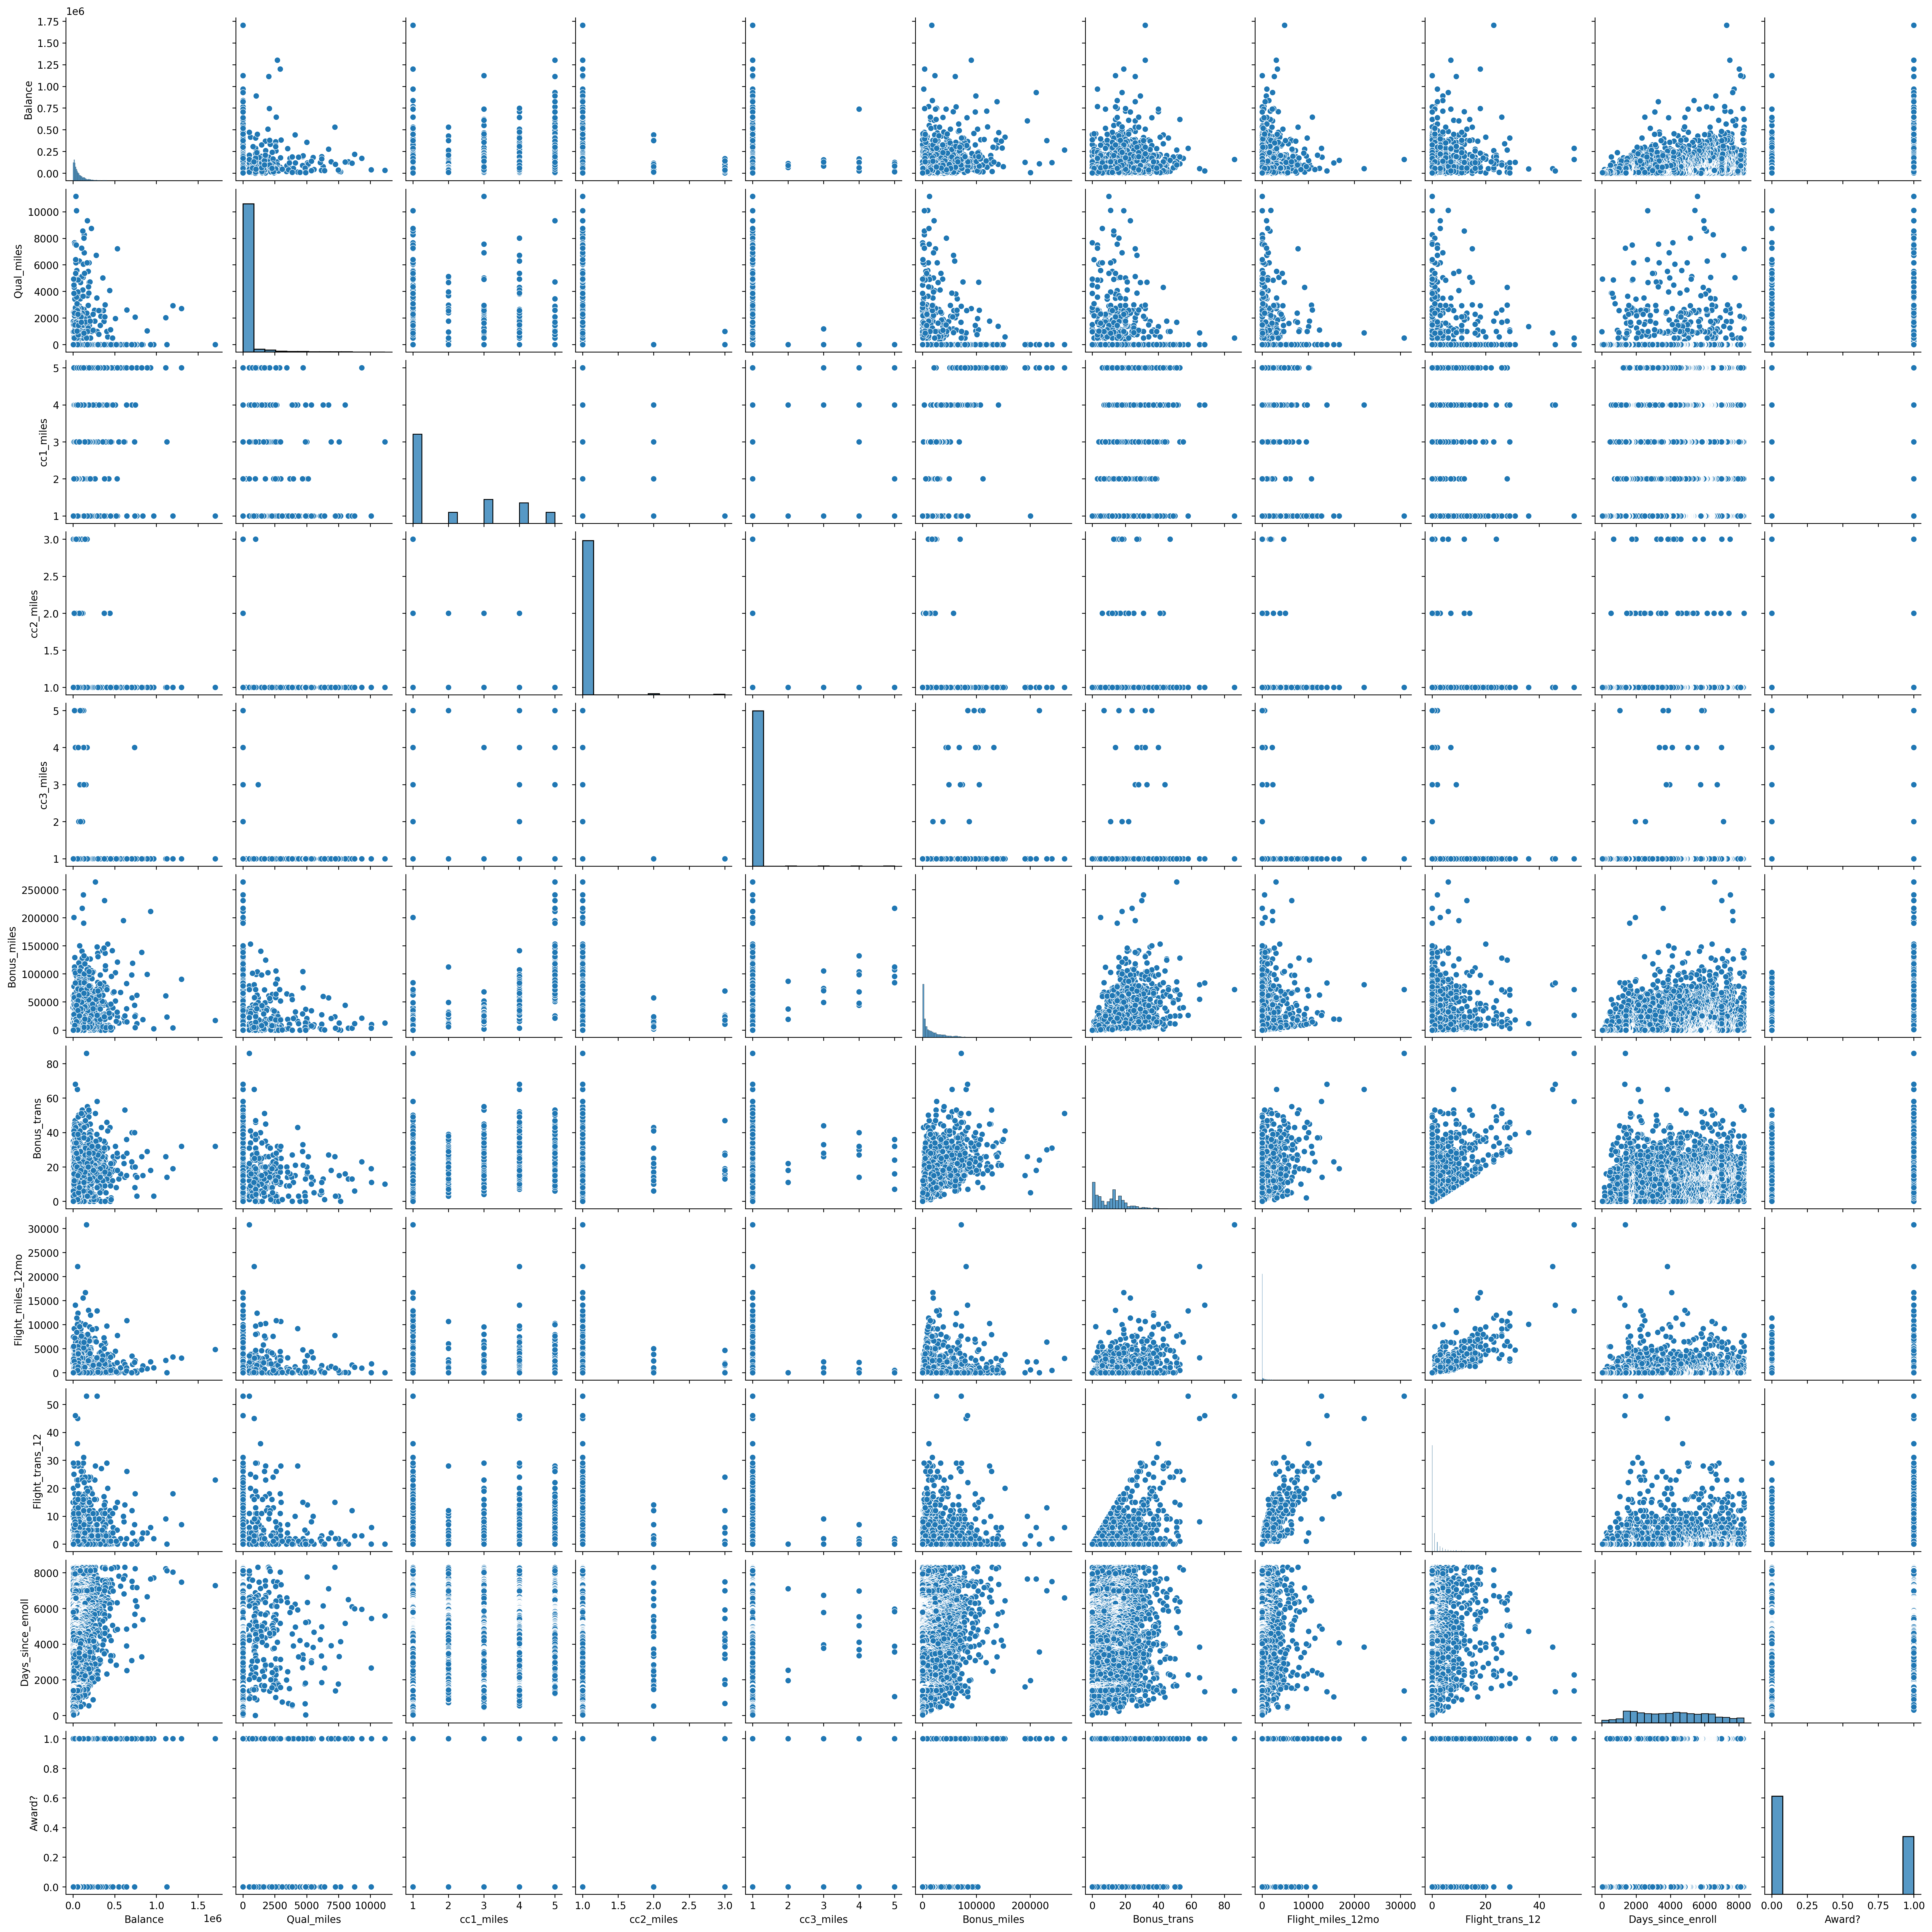

In [10]:
sns.pairplot(airlines_data)

In [11]:
airlines_data.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

<Axes: >

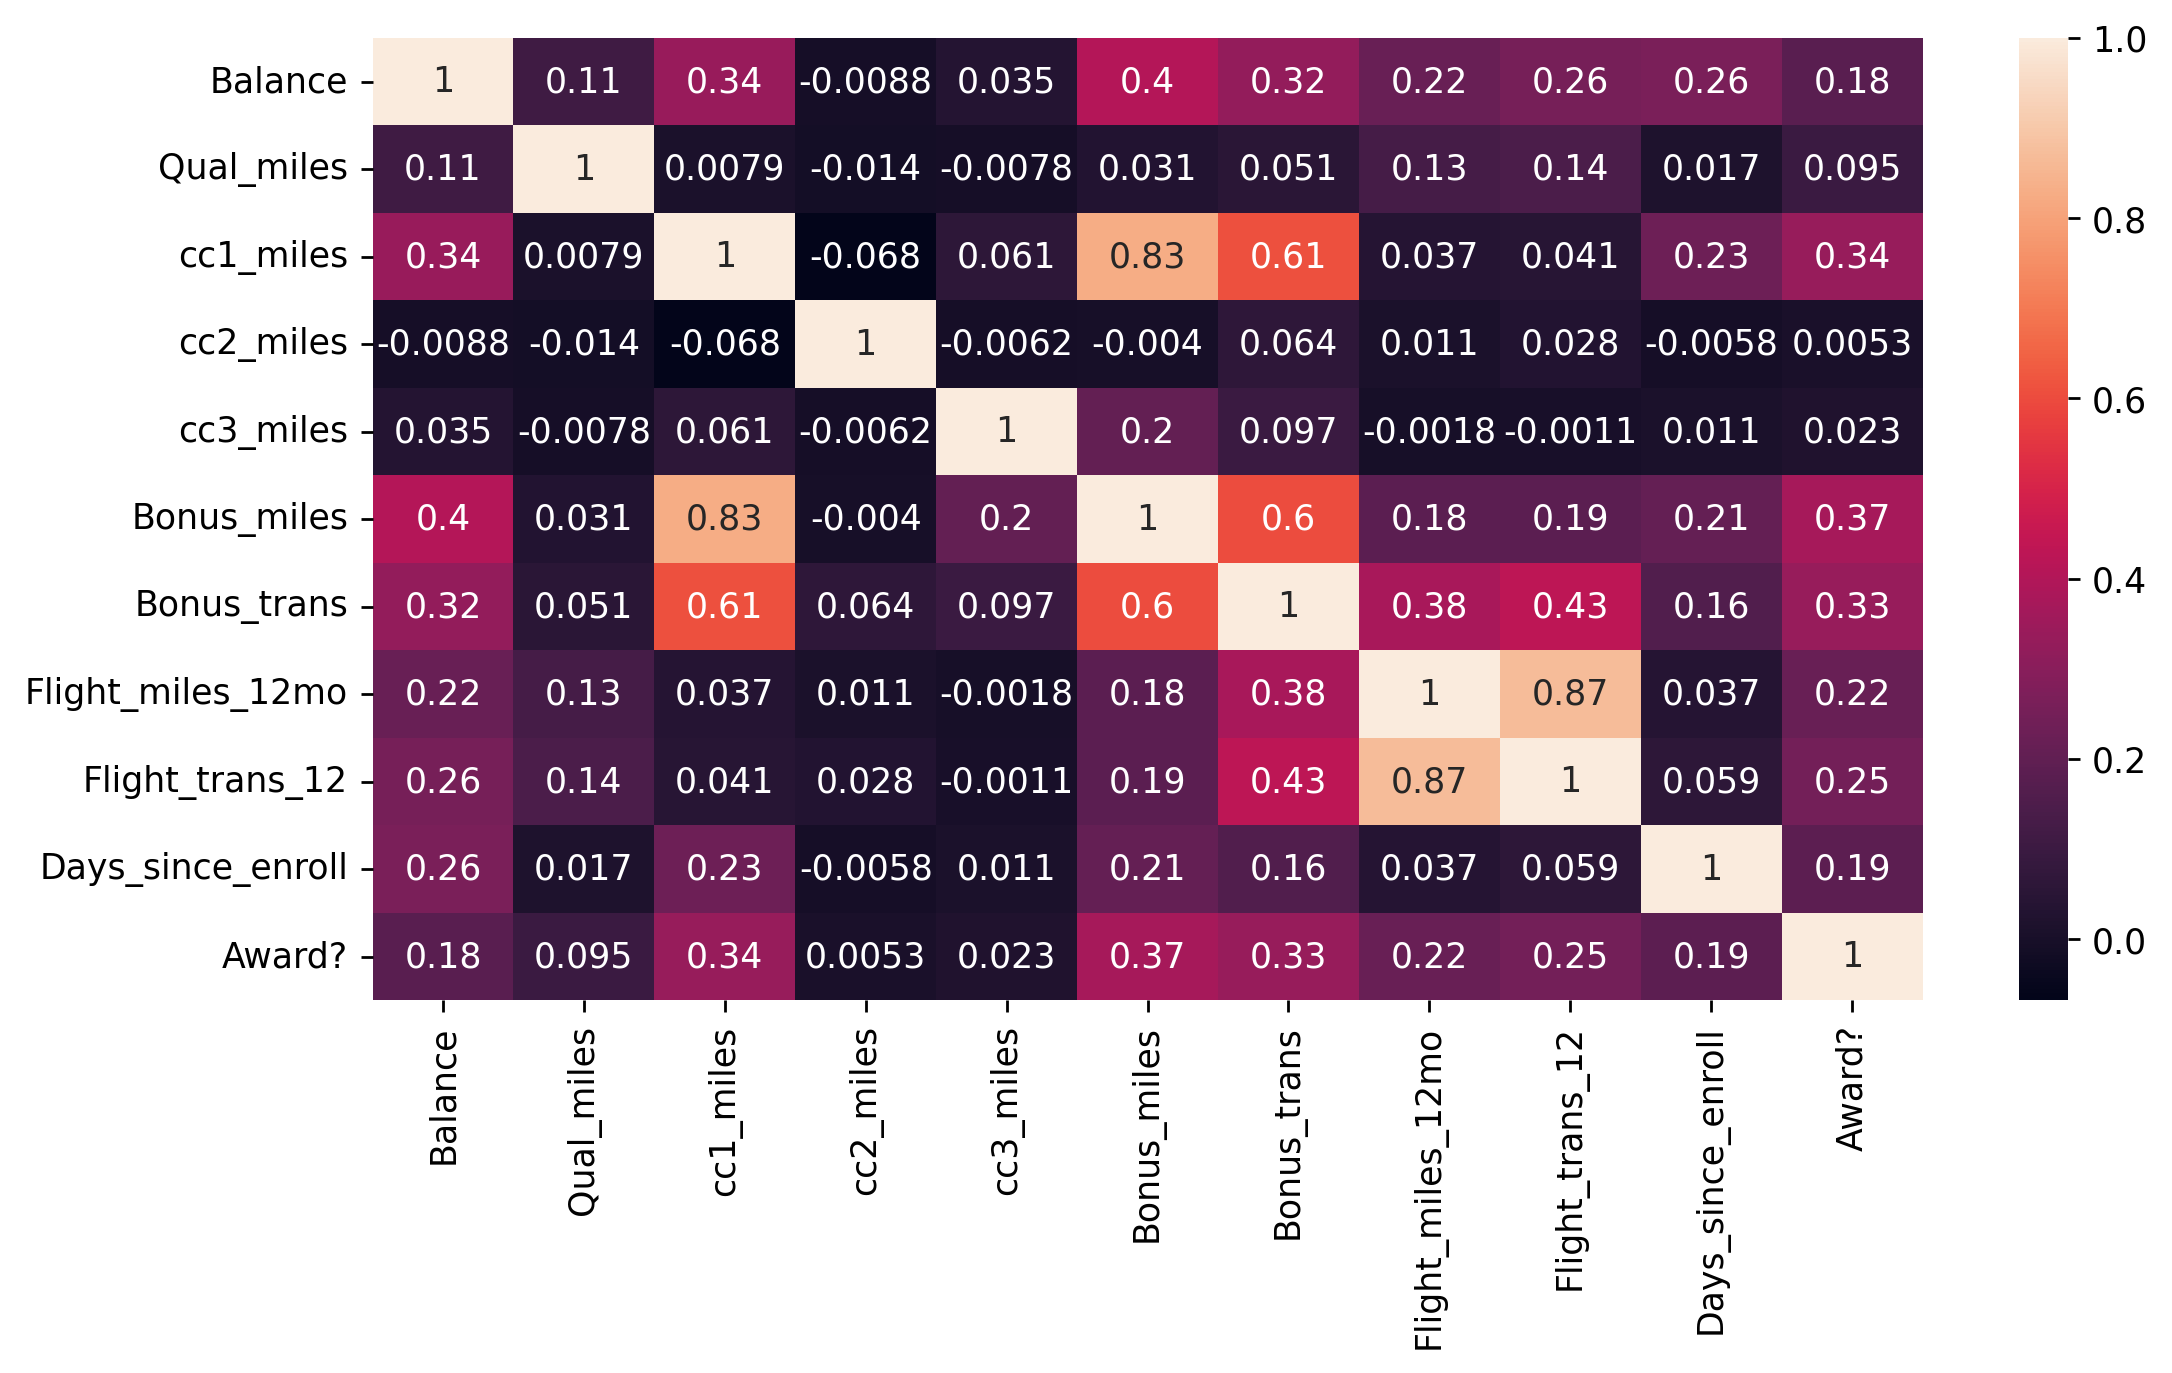

In [12]:
sns.heatmap(airlines_data.corr(), annot=True)
# cc1_miles is highly correlated to Bonus_miles and vice versa
# Bonas_trans is moderately correlated to cc1_miles and Bonus_miles and vice versa

In [13]:
# Preprocessing of the data using MinMax Scaling - Normalization
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
minmax_scaled = pd.DataFrame(mn.fit_transform(airlines_data), columns = airlines_data.columns)
minmax_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

##Implementing Clustering Algorithms:
1.	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
2.	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
3.	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


## A) Hierarchical Clustering

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Visualization for Hierarchical cluster

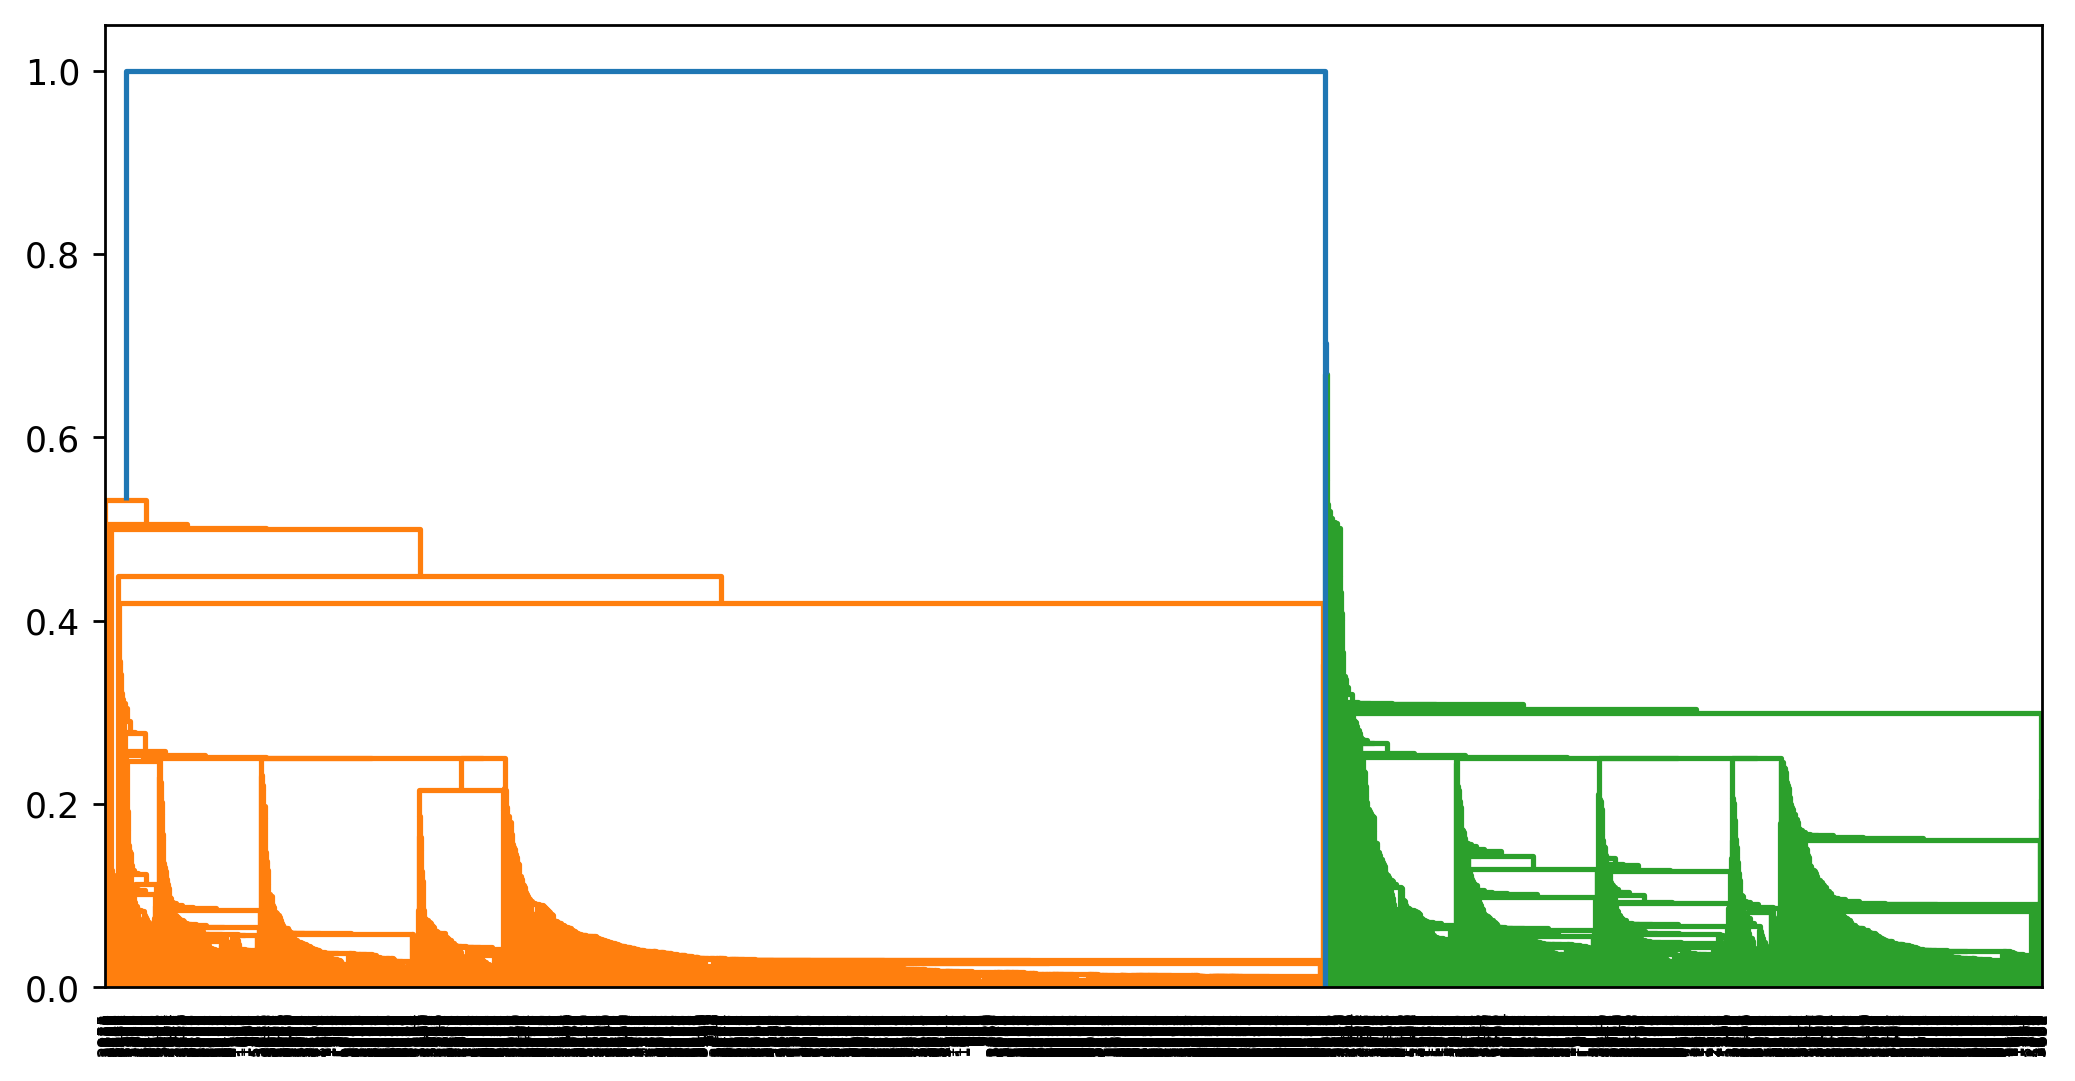

In [134]:
# Creating Dendrogram using the single linkage method
# Here we can see due to high number of data values, dendrogram is hard to understand
dendrogram = sch.dendrogram(sch.linkage(minmax_scaled, method='single'))

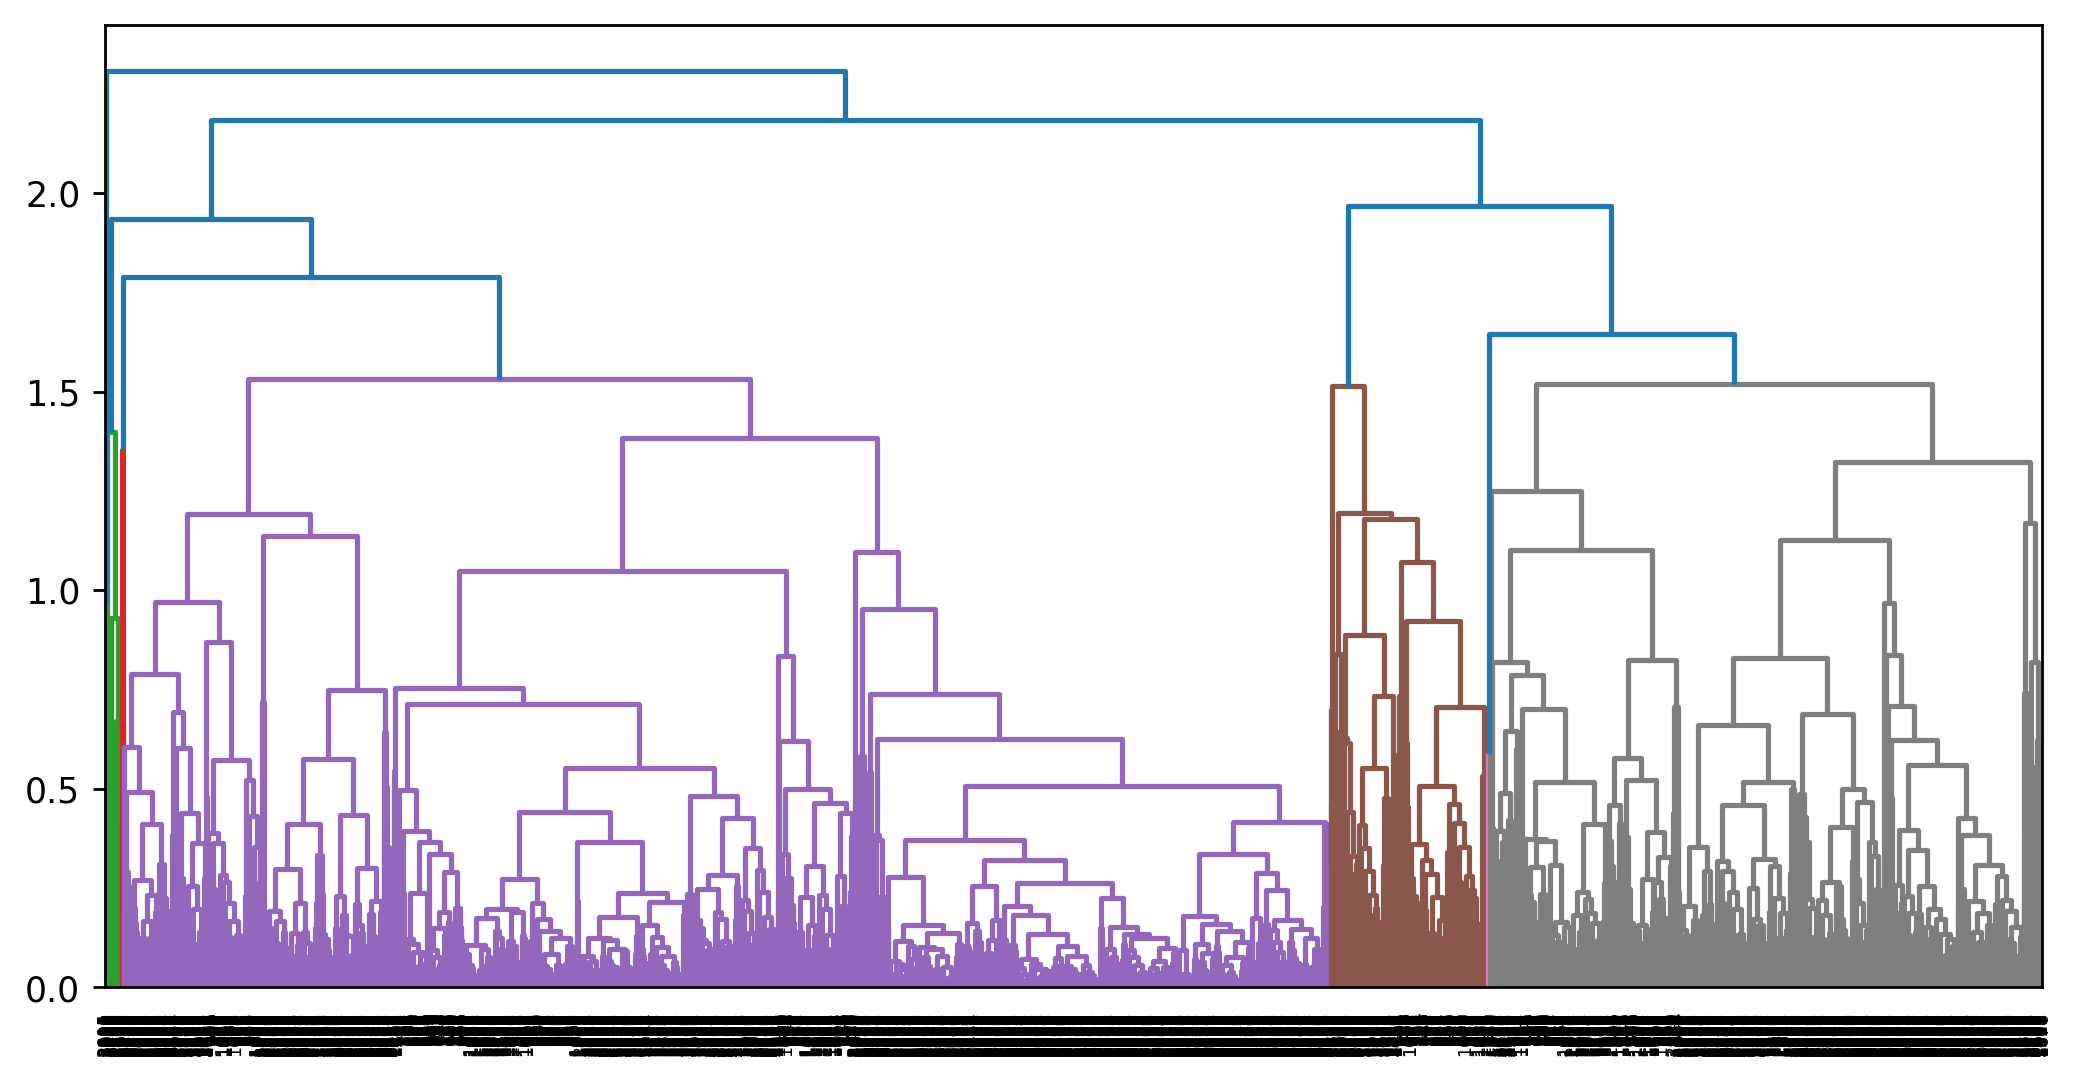

In [16]:
# Dendrogram using the complete linkage method
# Here we can see due to high number of data values, dendrogram is hard to understand but better than single linkage
dendrogram2 = sch.dendrogram(sch.linkage(minmax_scaled, method='complete'))

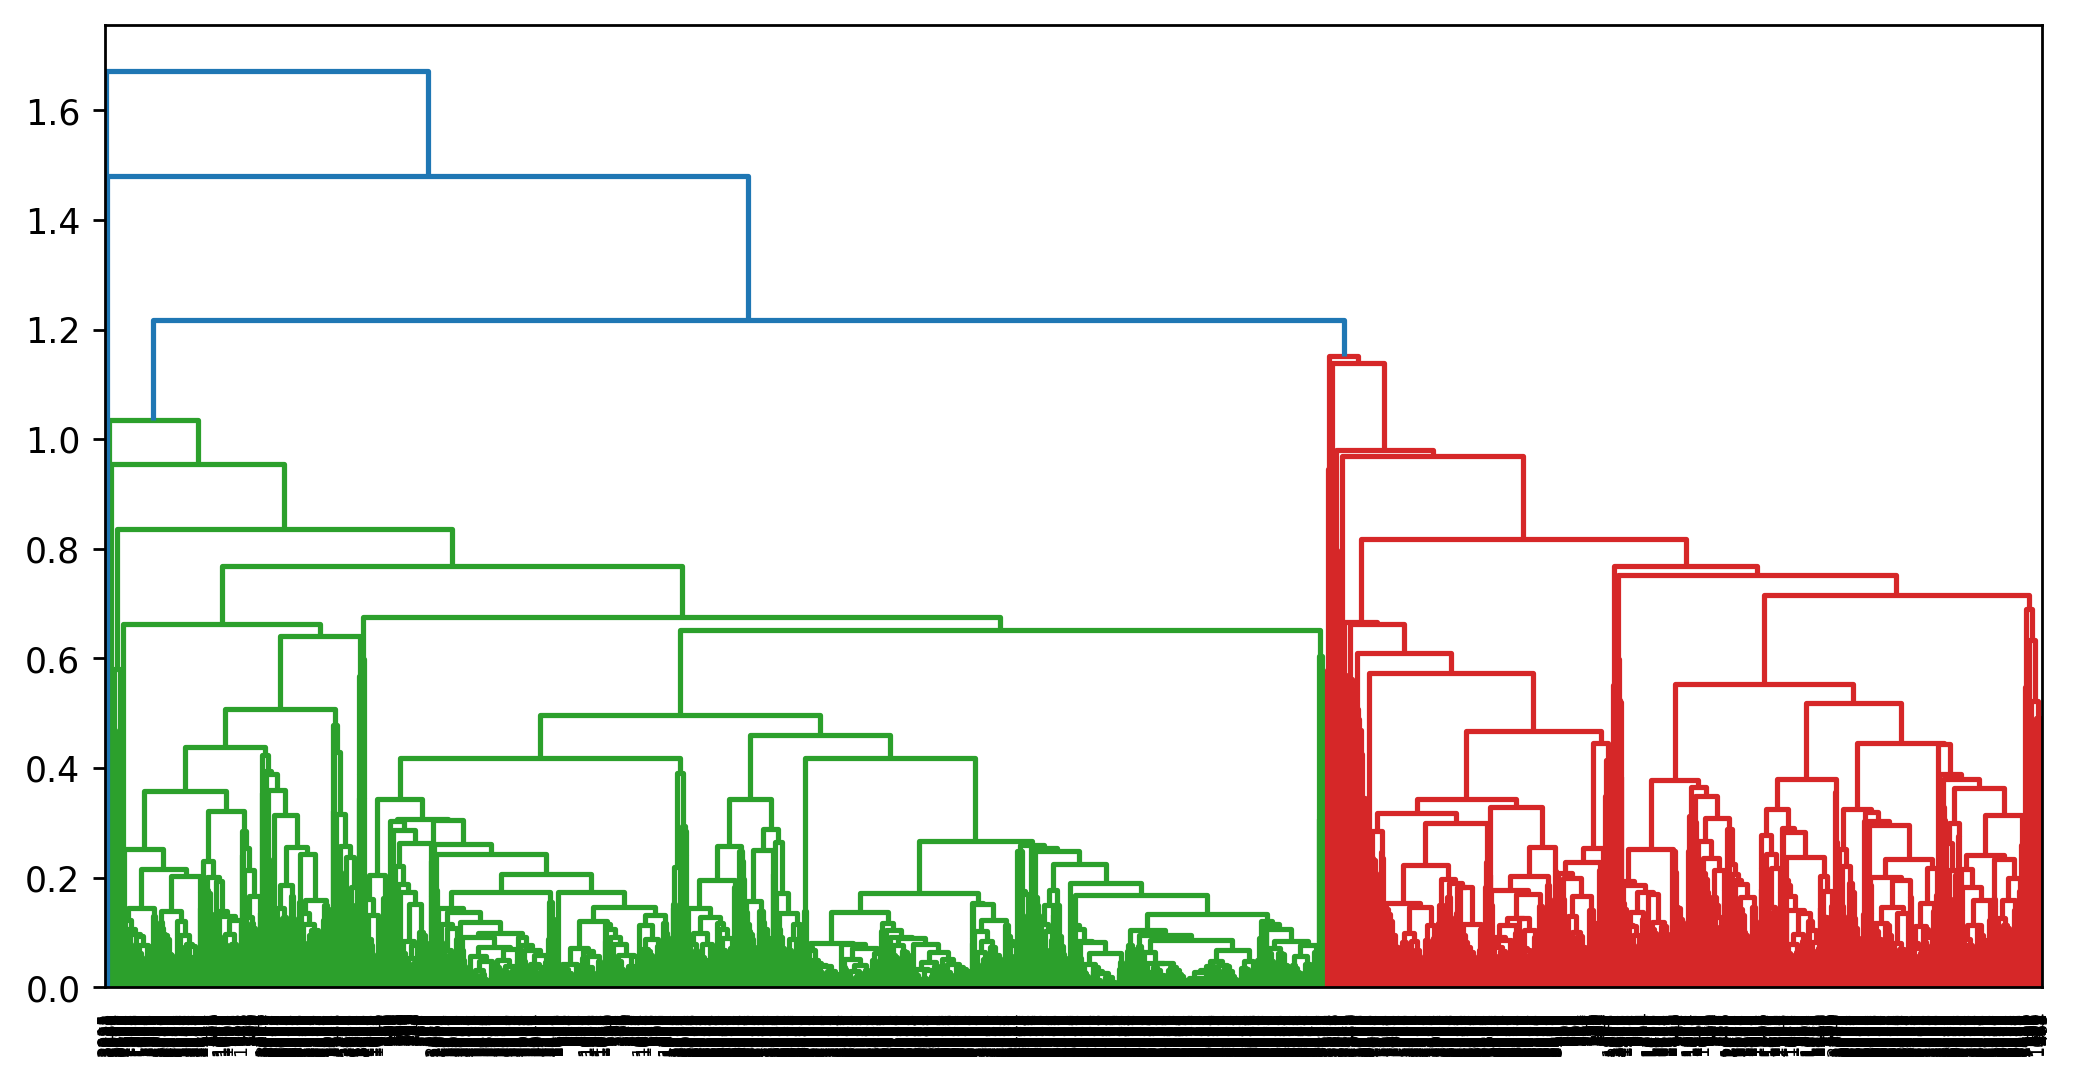

In [17]:
# Dendrogram using the average linkage method
# Here we can see due to high number of data values, dendrogram is hard to understand
dendrogram = sch.dendrogram(sch.linkage(minmax_scaled, method='average'))

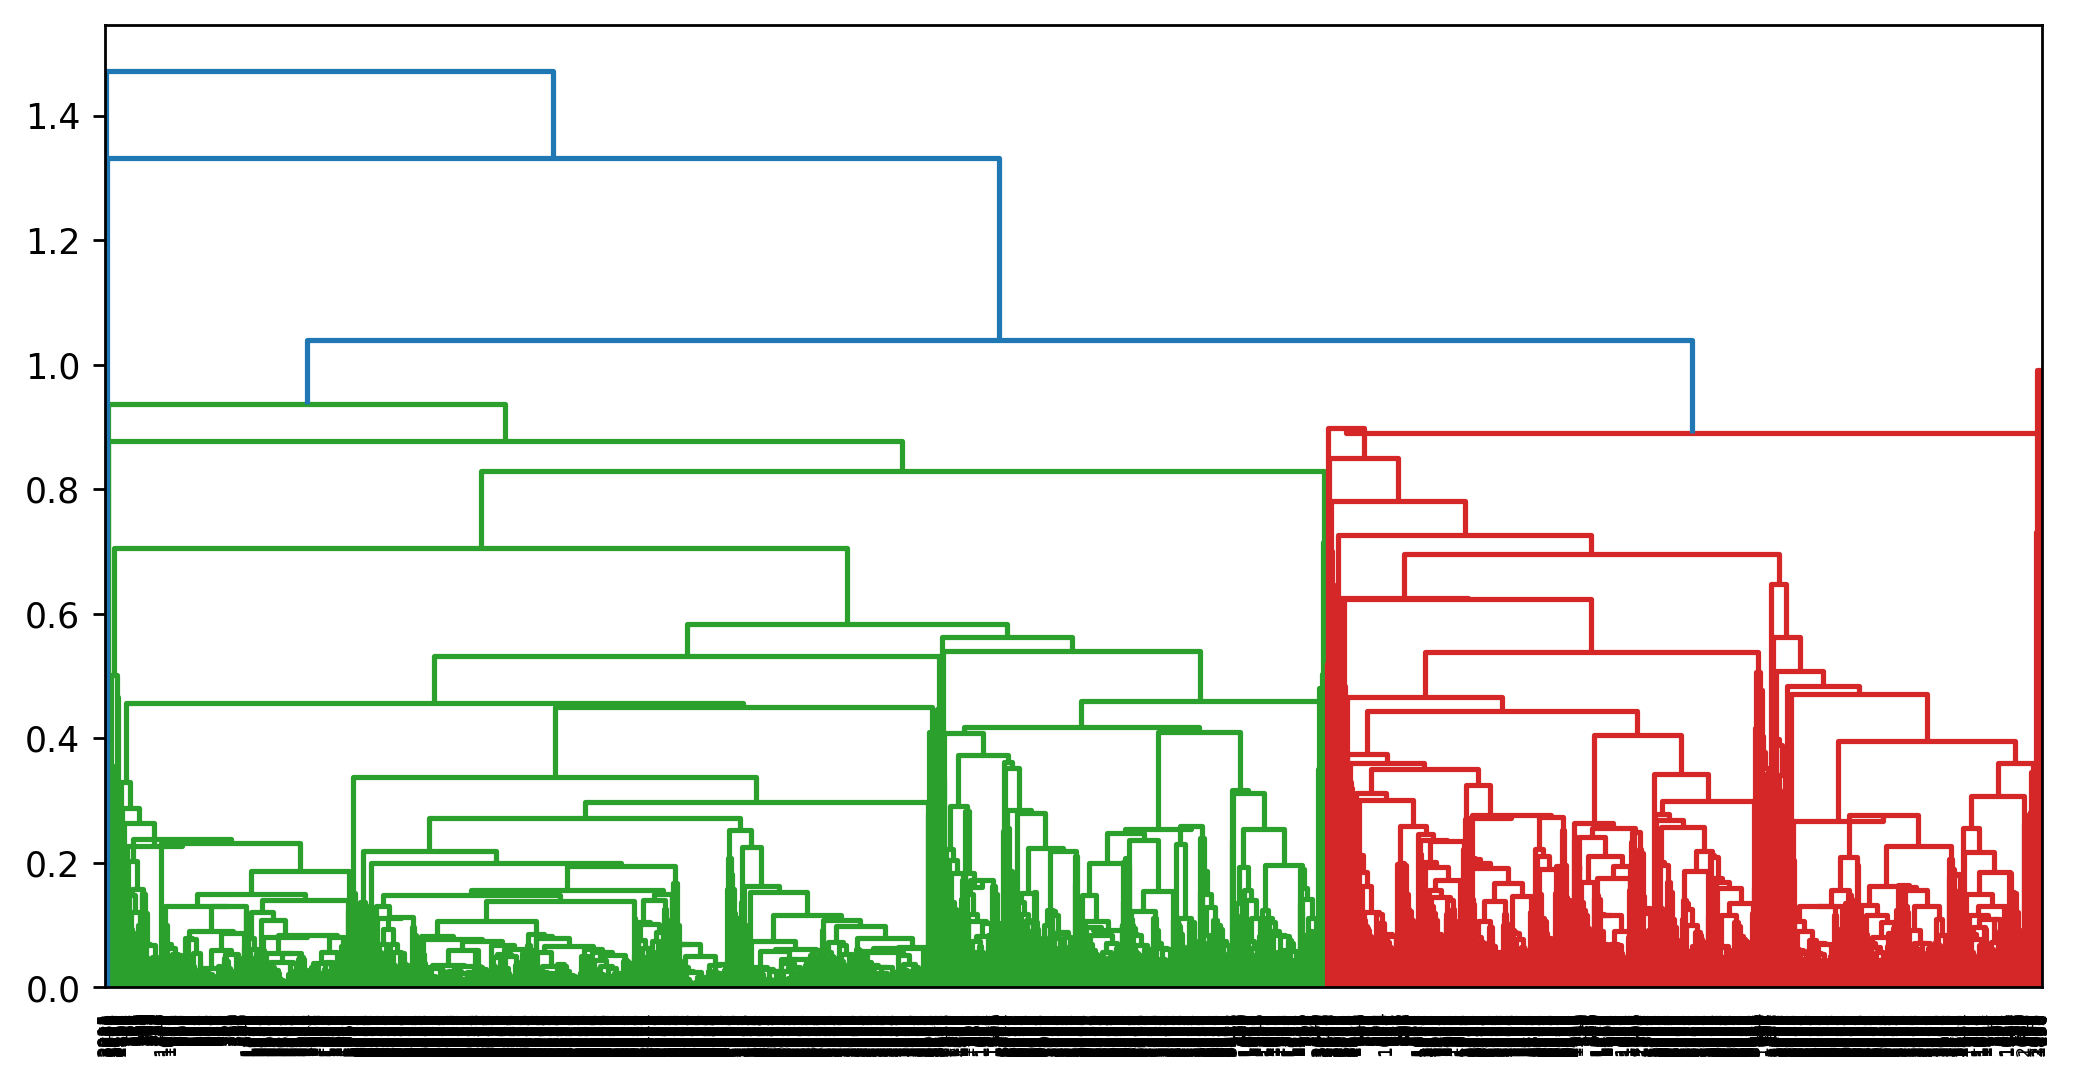

In [18]:
# Dendrogram using the centroid linkage method
# Here we can see due to high number of data values, dendrogram is hard to understand
dendrogram = sch.dendrogram(sch.linkage(minmax_scaled, method='centroid'))

In [19]:
# Suppose client needs 4 clusters
hc_4_avg = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='average')
hc_4_avg

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [20]:
y_hc_4_avg = hc_4_avg.fit_predict(minmax_scaled)
Clusters_4_avg = pd.DataFrame(y_hc_4_avg, columns=['Cluster_No'])
Clusters_4_avg

Cluster_No
0              1
1              1
2              1
3              1
4              0
...          ...
3994           0
3995           0
3996           0
3997           1
3998           1

[3999 rows x 1 columns]

In [21]:
Clusters_4_avg['Cluster_No'].value_counts()
# We can clearly see that cluster '0' and '1' have maximum number of homogeneous data points

Cluster_No
1    2518
0    1476
3       4
2       1
Name: count, dtype: int64

In [22]:
Airlines_hc_4_avg = airlines.join(Clusters_4_avg)
Airlines_hc_4_avg

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          1           0  
...      ...         ...  
3994       1           0  
3995       1           0  
3996       1           0  
3997       0           1  
3998       0           1  

[3999 rows x 13 columns]

In [23]:
# Lets try for 4 clusters with complete linkage method
hc_4_c = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='complete')
y_hc_4_c = hc_4_c.fit_predict(minmax_scaled)
Clusters_4_c = pd.DataFrame(y_hc_4_c, columns=['Cluster_No'])
Clusters_4_c['Cluster_No'].value_counts()
# We can clearly see how the data points are clustered

Cluster_No
0    2526
2    1144
1     325
3       4
Name: count, dtype: int64

In [24]:
Airlines_hc_4_complete = airlines.join(Clusters_4_c)
Airlines_hc_4_complete

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          1           1  
...      ...         ...  
3994       1           2  
3995       1           2  
3996       1           2  
3997       0           0  
3998       0           0  

[3999 rows x 13 columns]

In [25]:
# Lets try for 4 clusters with single linkage method
hc_4_s = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='single')
y_hc_4_s = hc_4_s.fit_predict(minmax_scaled)
Clusters_4_s = pd.DataFrame(y_hc_4_s, columns=['Cluster_No'])
Clusters_4_s['Cluster_No'].value_counts()
# We can clearly see how the data points are clustered

Cluster_No
1    2518
0    1479
3       1
2       1
Name: count, dtype: int64

### Hierarchical cluster Analysis and Interpretation
Here, we can clearly see that, 2 clusters shows maximum cluster points. But due to large number of data points, Hierarchical clustering is not suitable.

##B) K-Means Clustering

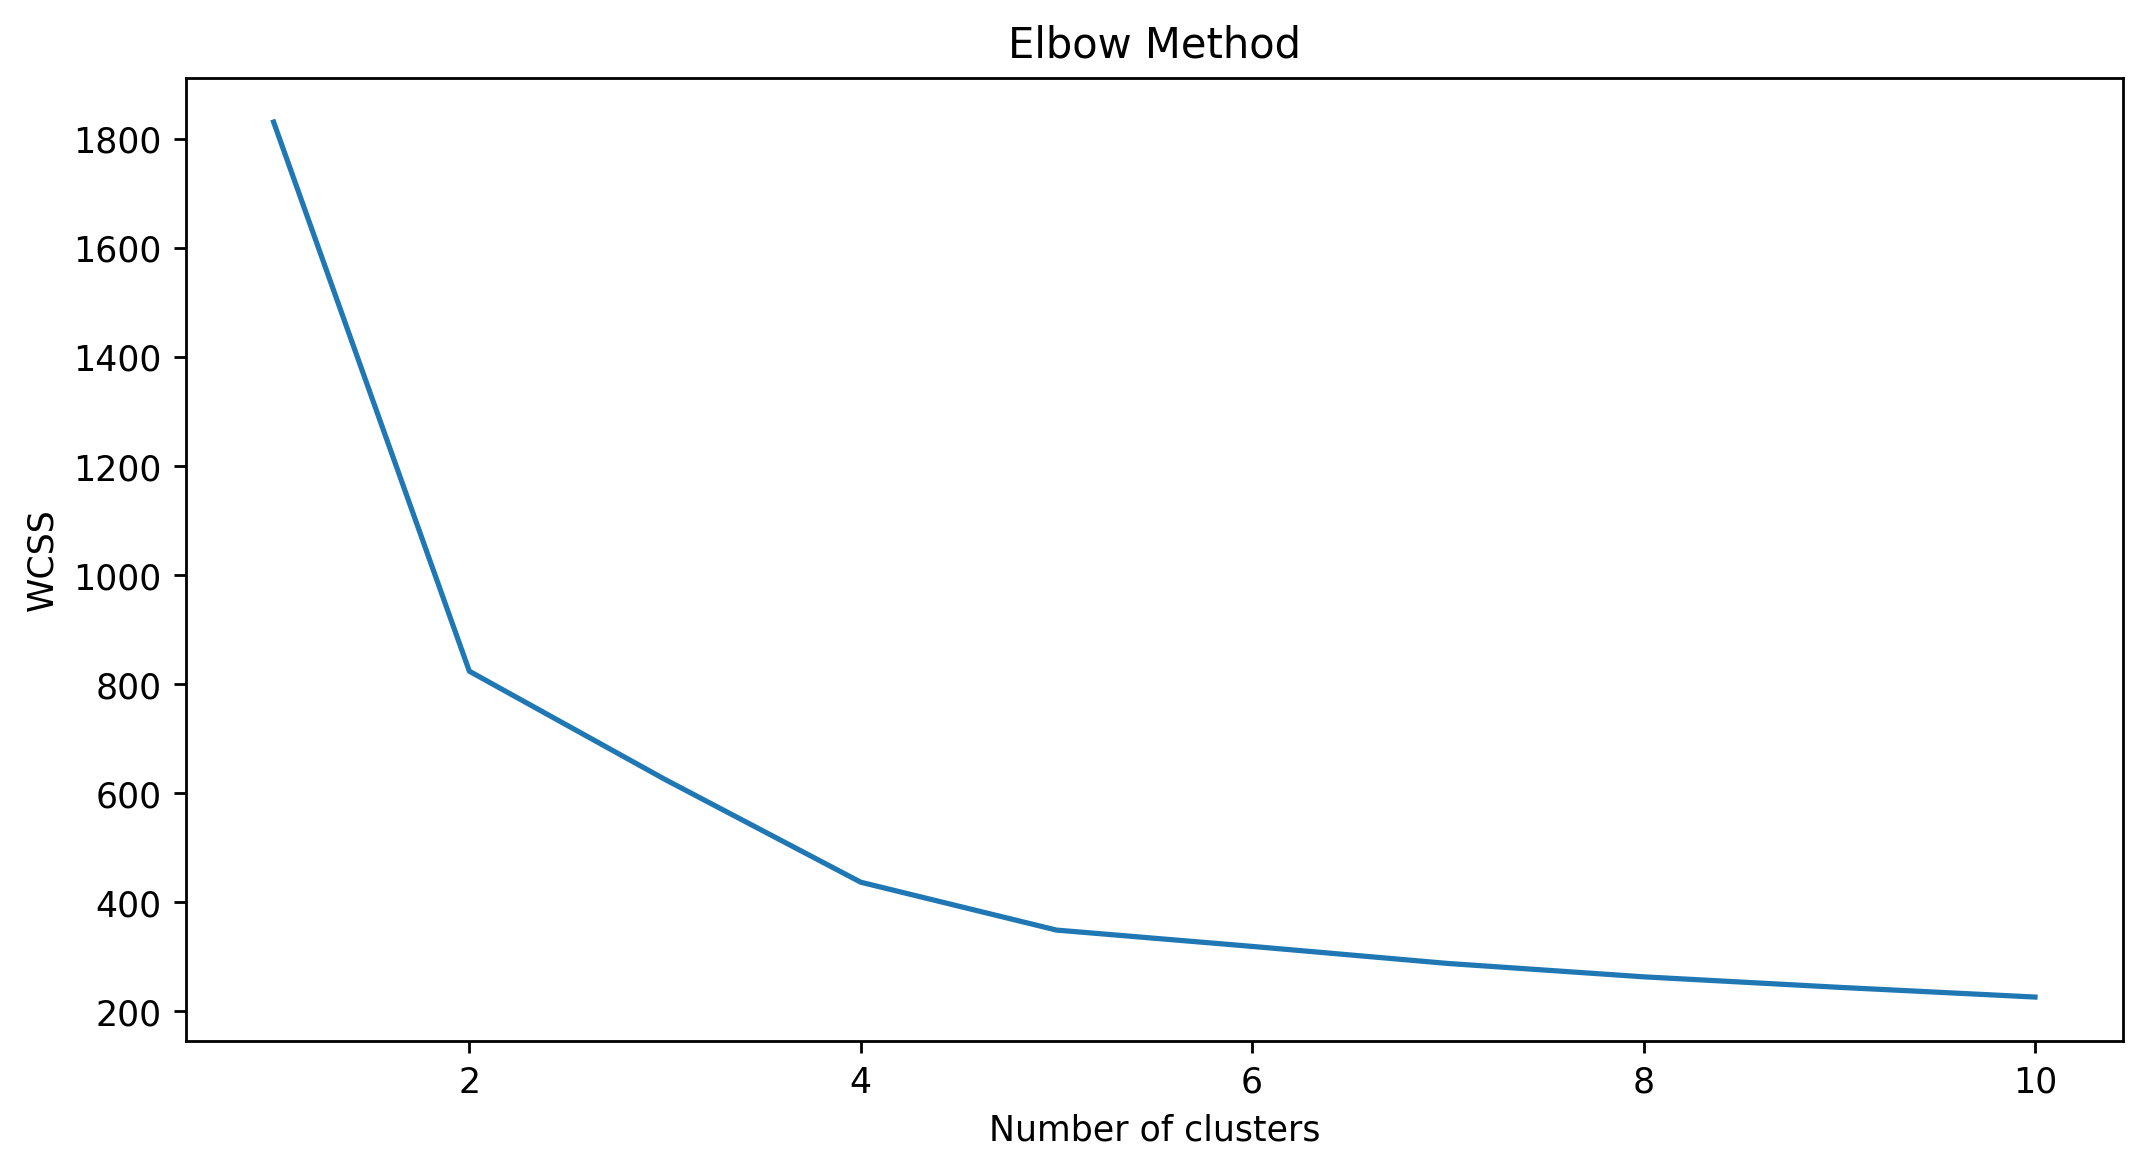

In [136]:
from sklearn.cluster import KMeans

# Good model is one with low inertia AND a low number of clusters(K)
# suppose K=10, create for loop to create a list of 10 WCSS
wcss = [] # Within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(minmax_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Location of the bend is to be taken as 2 or 3.

In [58]:
wcss

[1830.793212858411,
 823.6756984125209,
 625.1684881570724,
 436.7171900419562,
 348.9433217254141,
 319.01115138210804,
 287.7295534651799,
 263.214299891393,
 243.92574880337366,
 226.10985005074014]

In [59]:
kmeans = KMeans(n_clusters=2,random_state=0) # pass no. of clusters as 2
predict_2=kmeans.fit_predict(minmax_scaled)# assign cluster numbers to IDs
predict_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [60]:
Clusters_kmean_2 = pd.DataFrame(predict_2, columns=['Cluster_No'])
KM_airlines_2 = airlines.join(Clusters_kmean_2)
KM_airlines_2

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          1           0  
...      ...         ...  
3994       1           0  
3995       1           0  
3996       1           0  
3997       0           1  
3998       0           1  

[3999 rows x 13 columns]

###Visualization

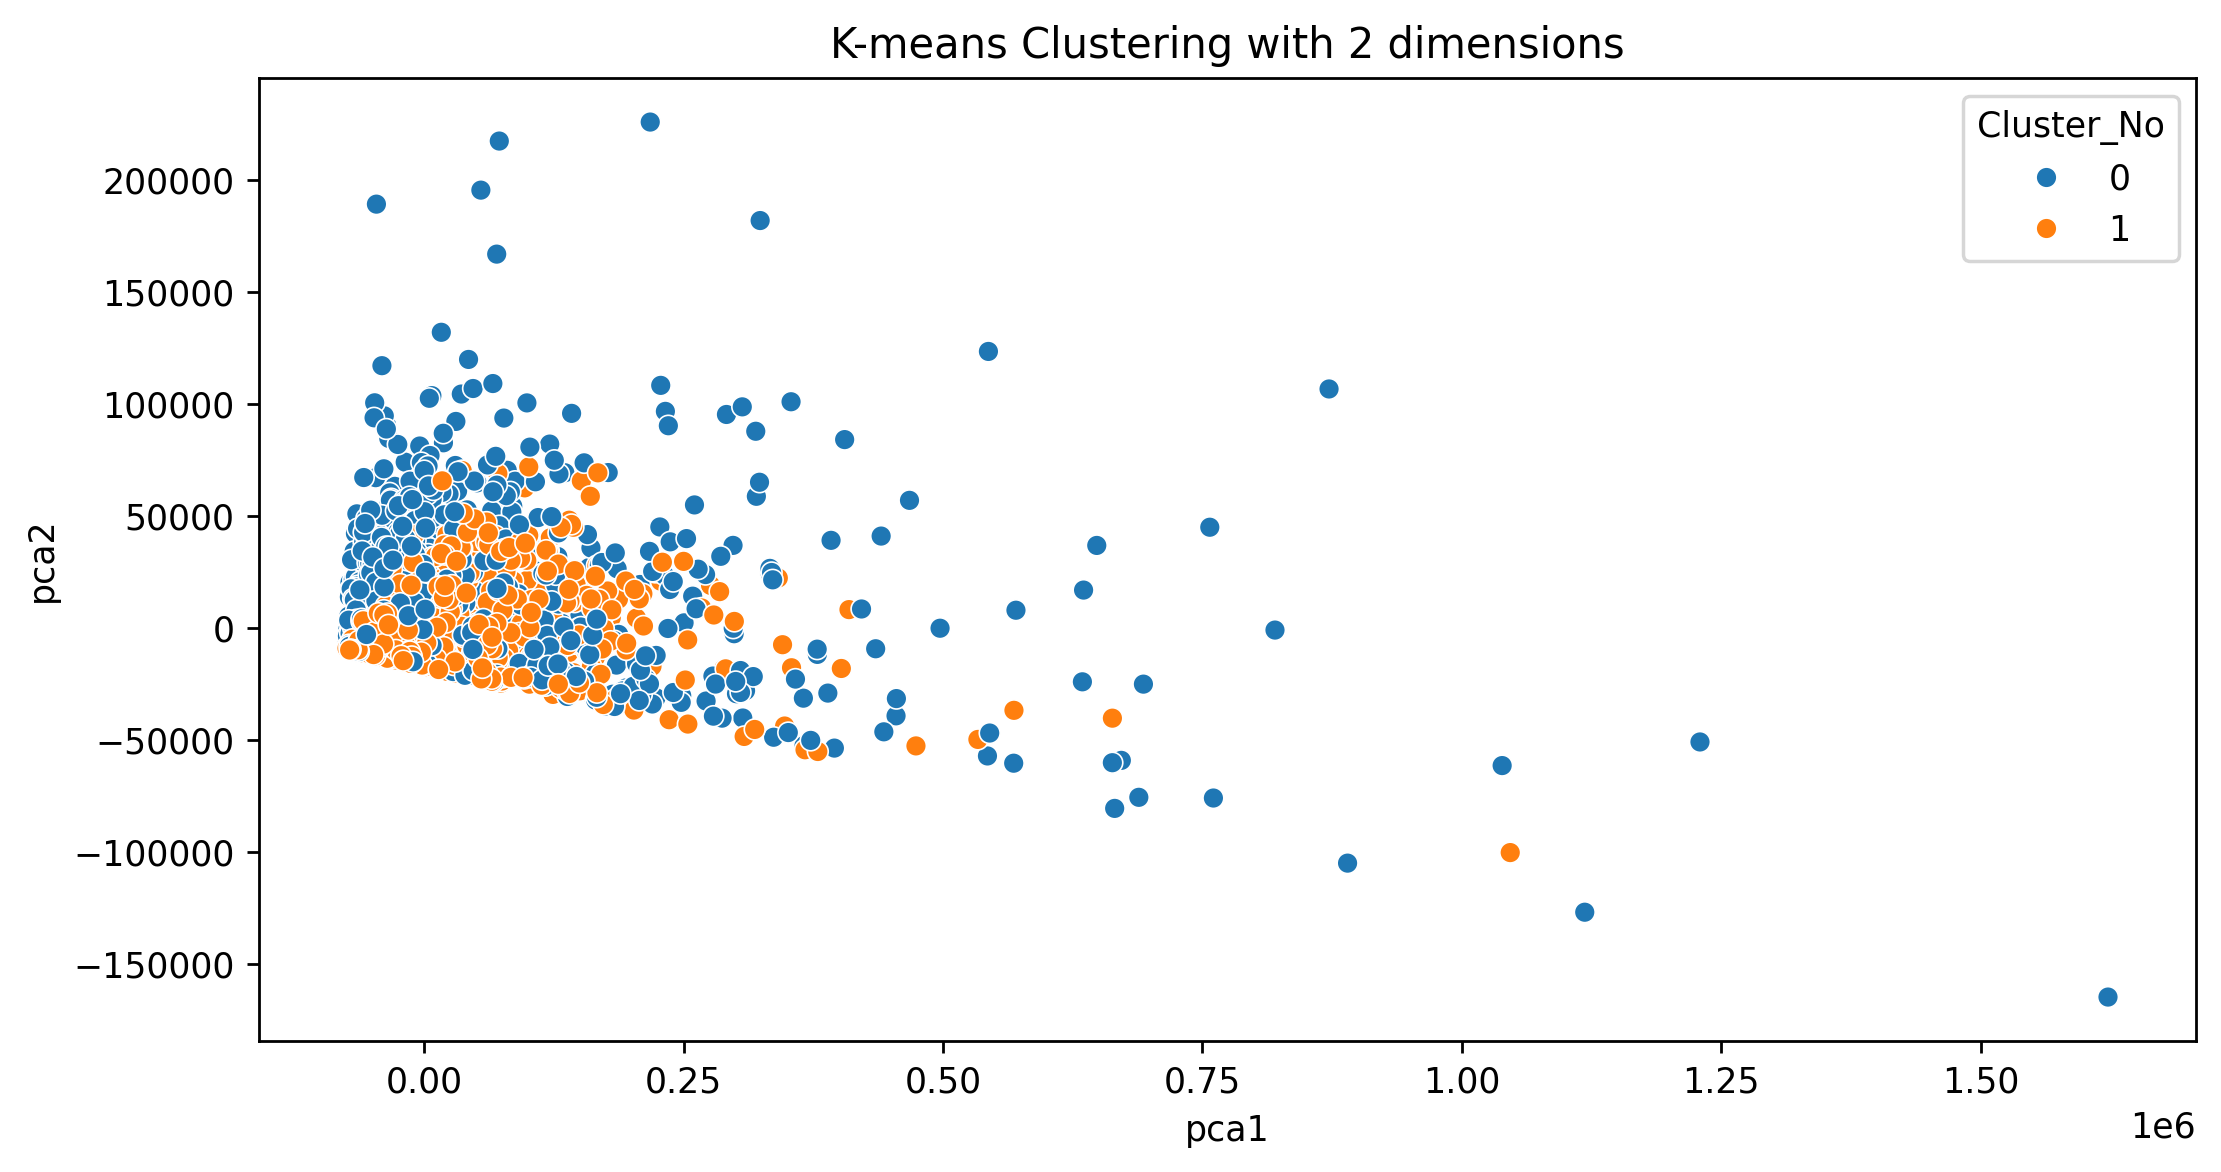

In [61]:
#Scatter diagram for 2 clusters using K-means
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(KM_airlines_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=KM_airlines_2['Cluster_No'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3,random_state=0) # pass no. of clusters as 3
predict_3=kmeans.fit_predict(minmax_scaled)# assign cluster numbers to IDs
predict_3

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [139]:
Clusters_kmean_3 = pd.DataFrame(predict_3, columns=['Cluster_No'])
KM_airlines_3 = airlines.join(Clusters_kmean_3)
KM_airlines_3

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           2  
1          0           2  
2          0           2  
3          0           2  
4          1           1  
...      ...         ...  
3994       1           1  
3995       1           1  
3996       1           1  
3997       0           2  
3998       0           2  

[3999 rows x 13 columns]

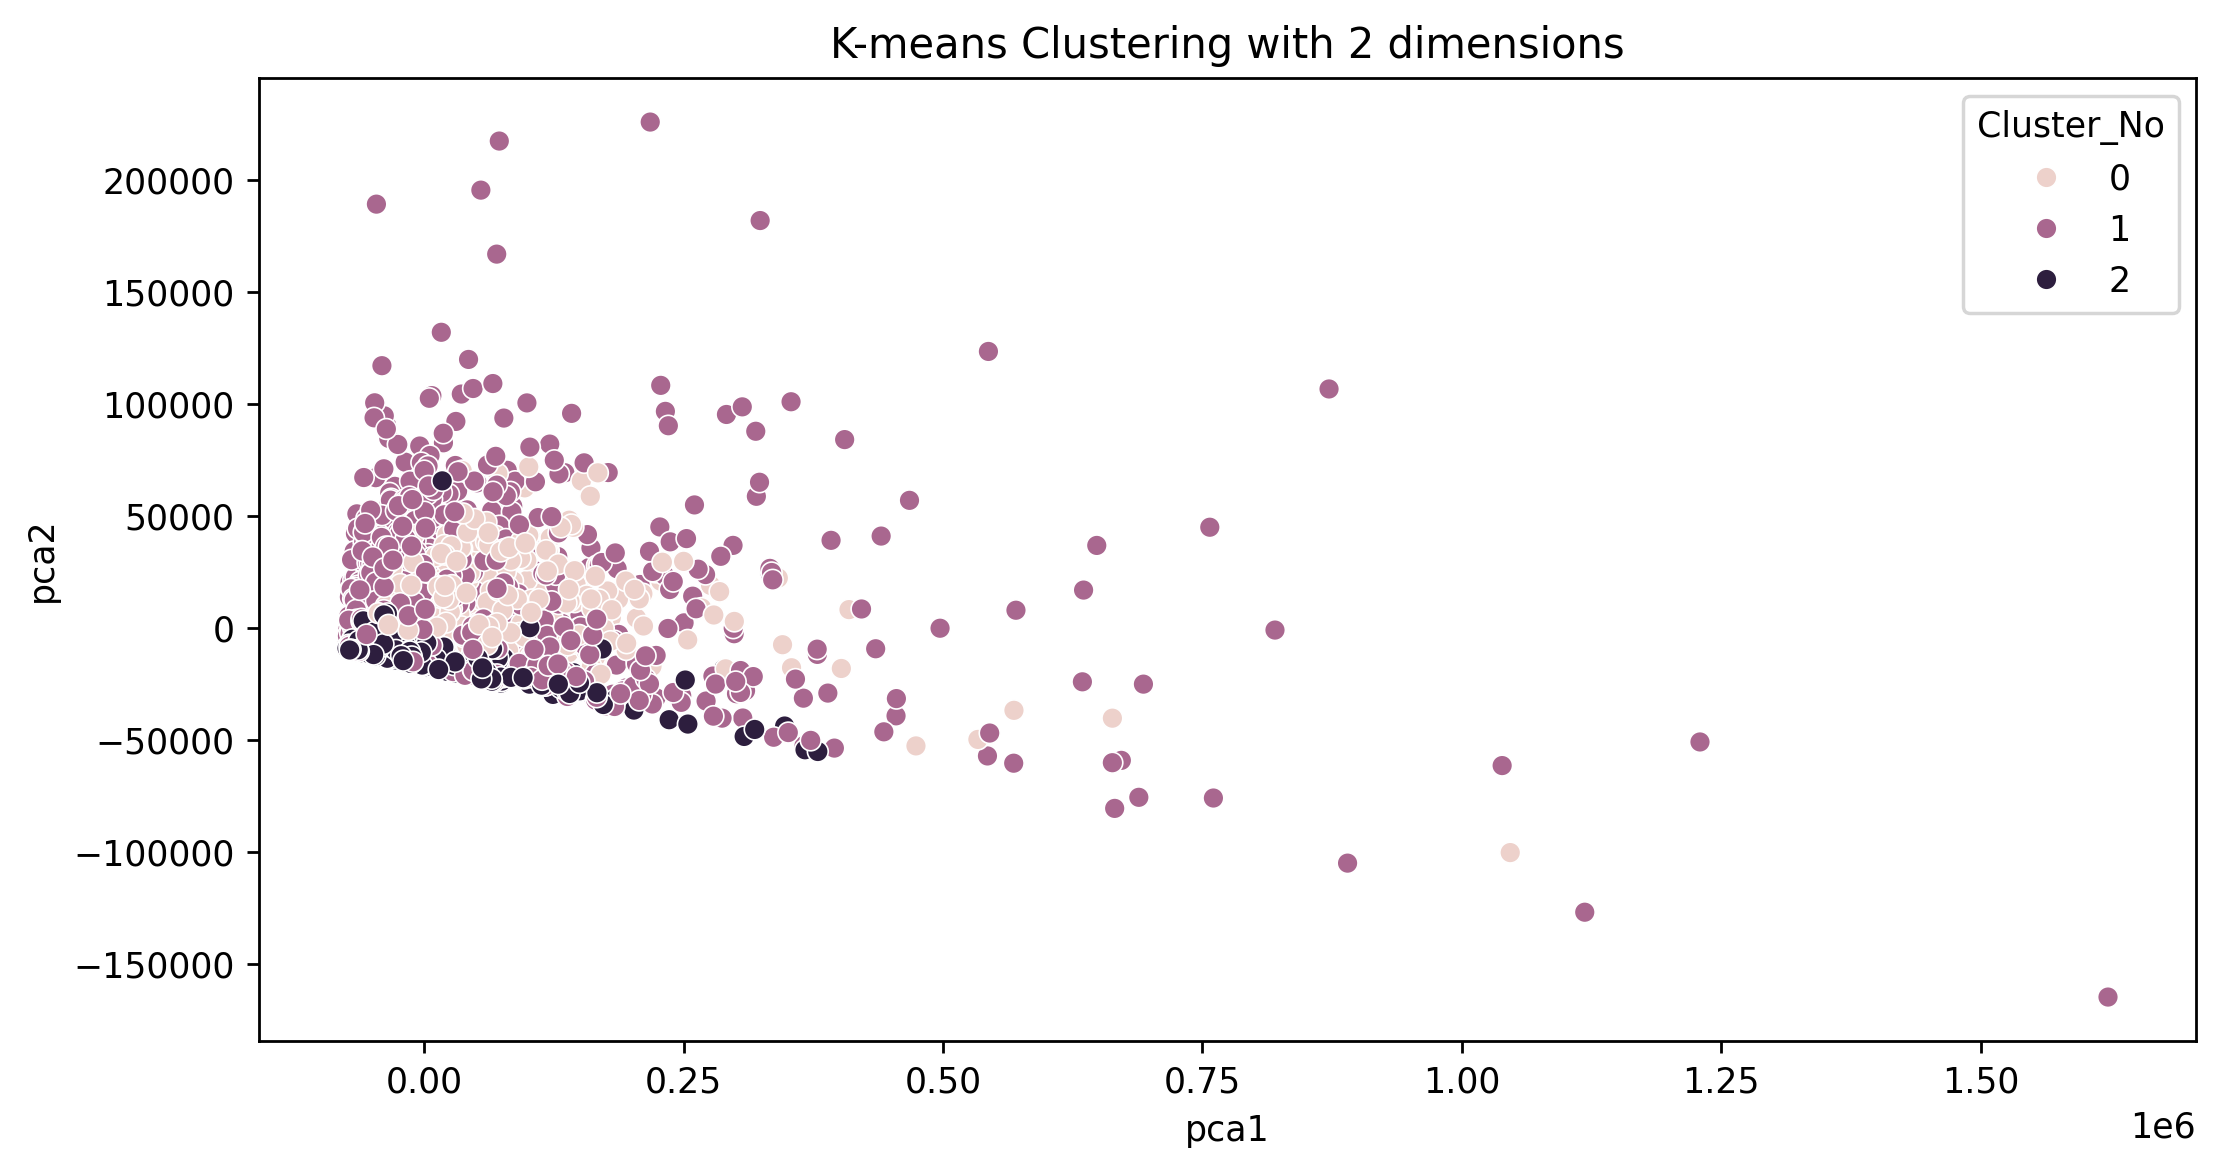

In [140]:
#Scatter diagram for 3 clusters using K-means
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(KM_airlines_3)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=KM_airlines_3['Cluster_No'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Evaluation and Performance Metrics

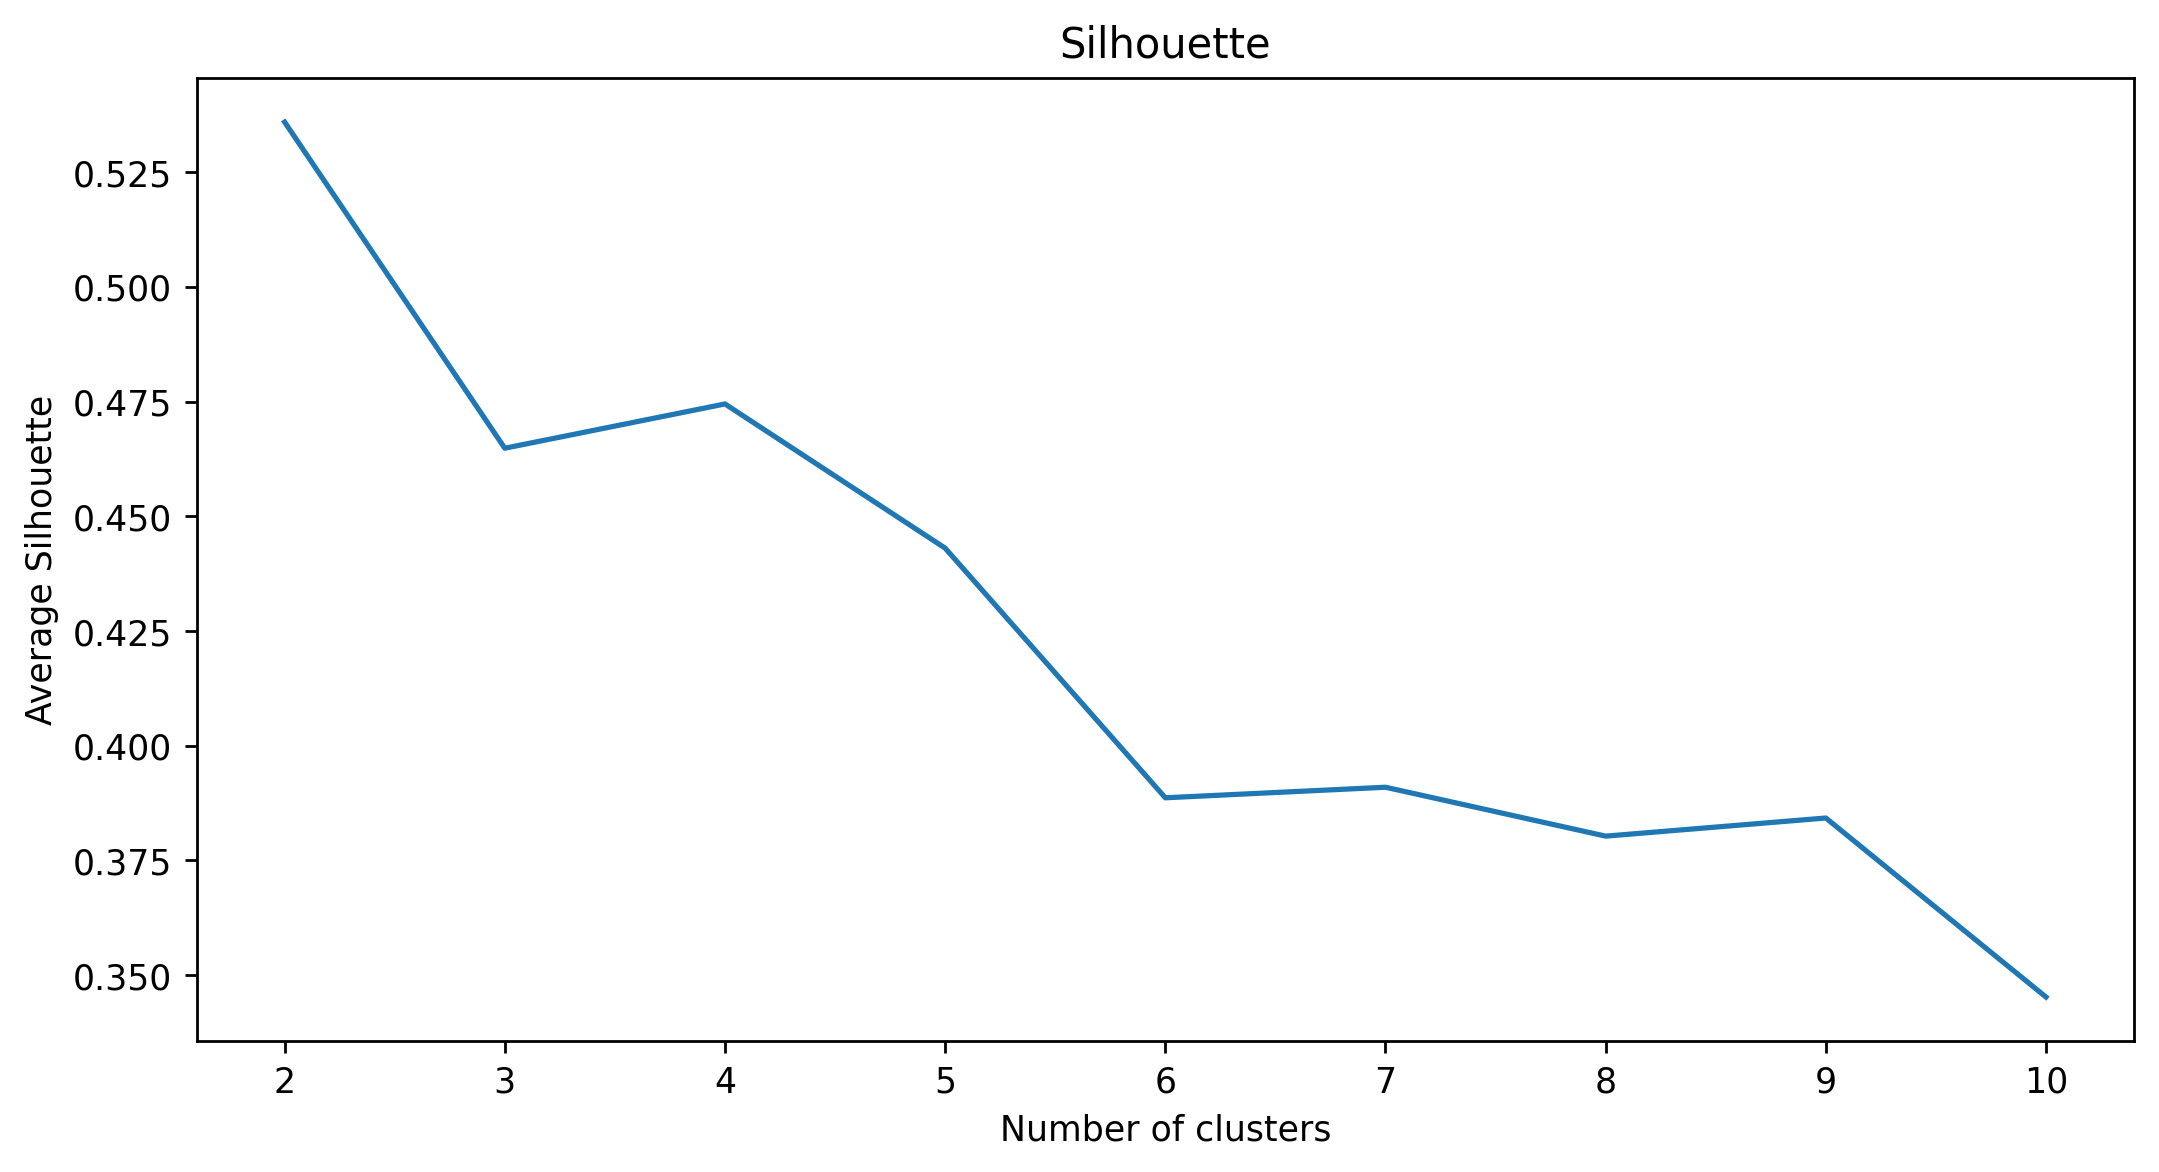

In [65]:
# Using Silhouette score
from sklearn.metrics import silhouette_score
sil = [] # Within cluster sum of square
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(minmax_scaled)
    kmeans_labels = kmeans.fit_predict(minmax_scaled)
    sil.append(silhouette_score(minmax_scaled, kmeans_labels))

plt.plot(range(2,11), sil)
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette')
plt.show()
# Optimum value of k is 4

In [66]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict_4=kmeans.fit_predict(minmax_scaled)# assign cluster numbers to IDs
predict_4

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [67]:
Clusters_kmean_4 = pd.DataFrame(predict_4, columns=['Cluster_No'])
KM_airlines_4 = airlines.join(Clusters_kmean_4)
KM_airlines_4

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          1           2  
...      ...         ...  
3994       1           0  
3995       1           0  
3996       1           2  
3997       0           1  
3998       0           1  

[3999 rows x 13 columns]

### Visualization

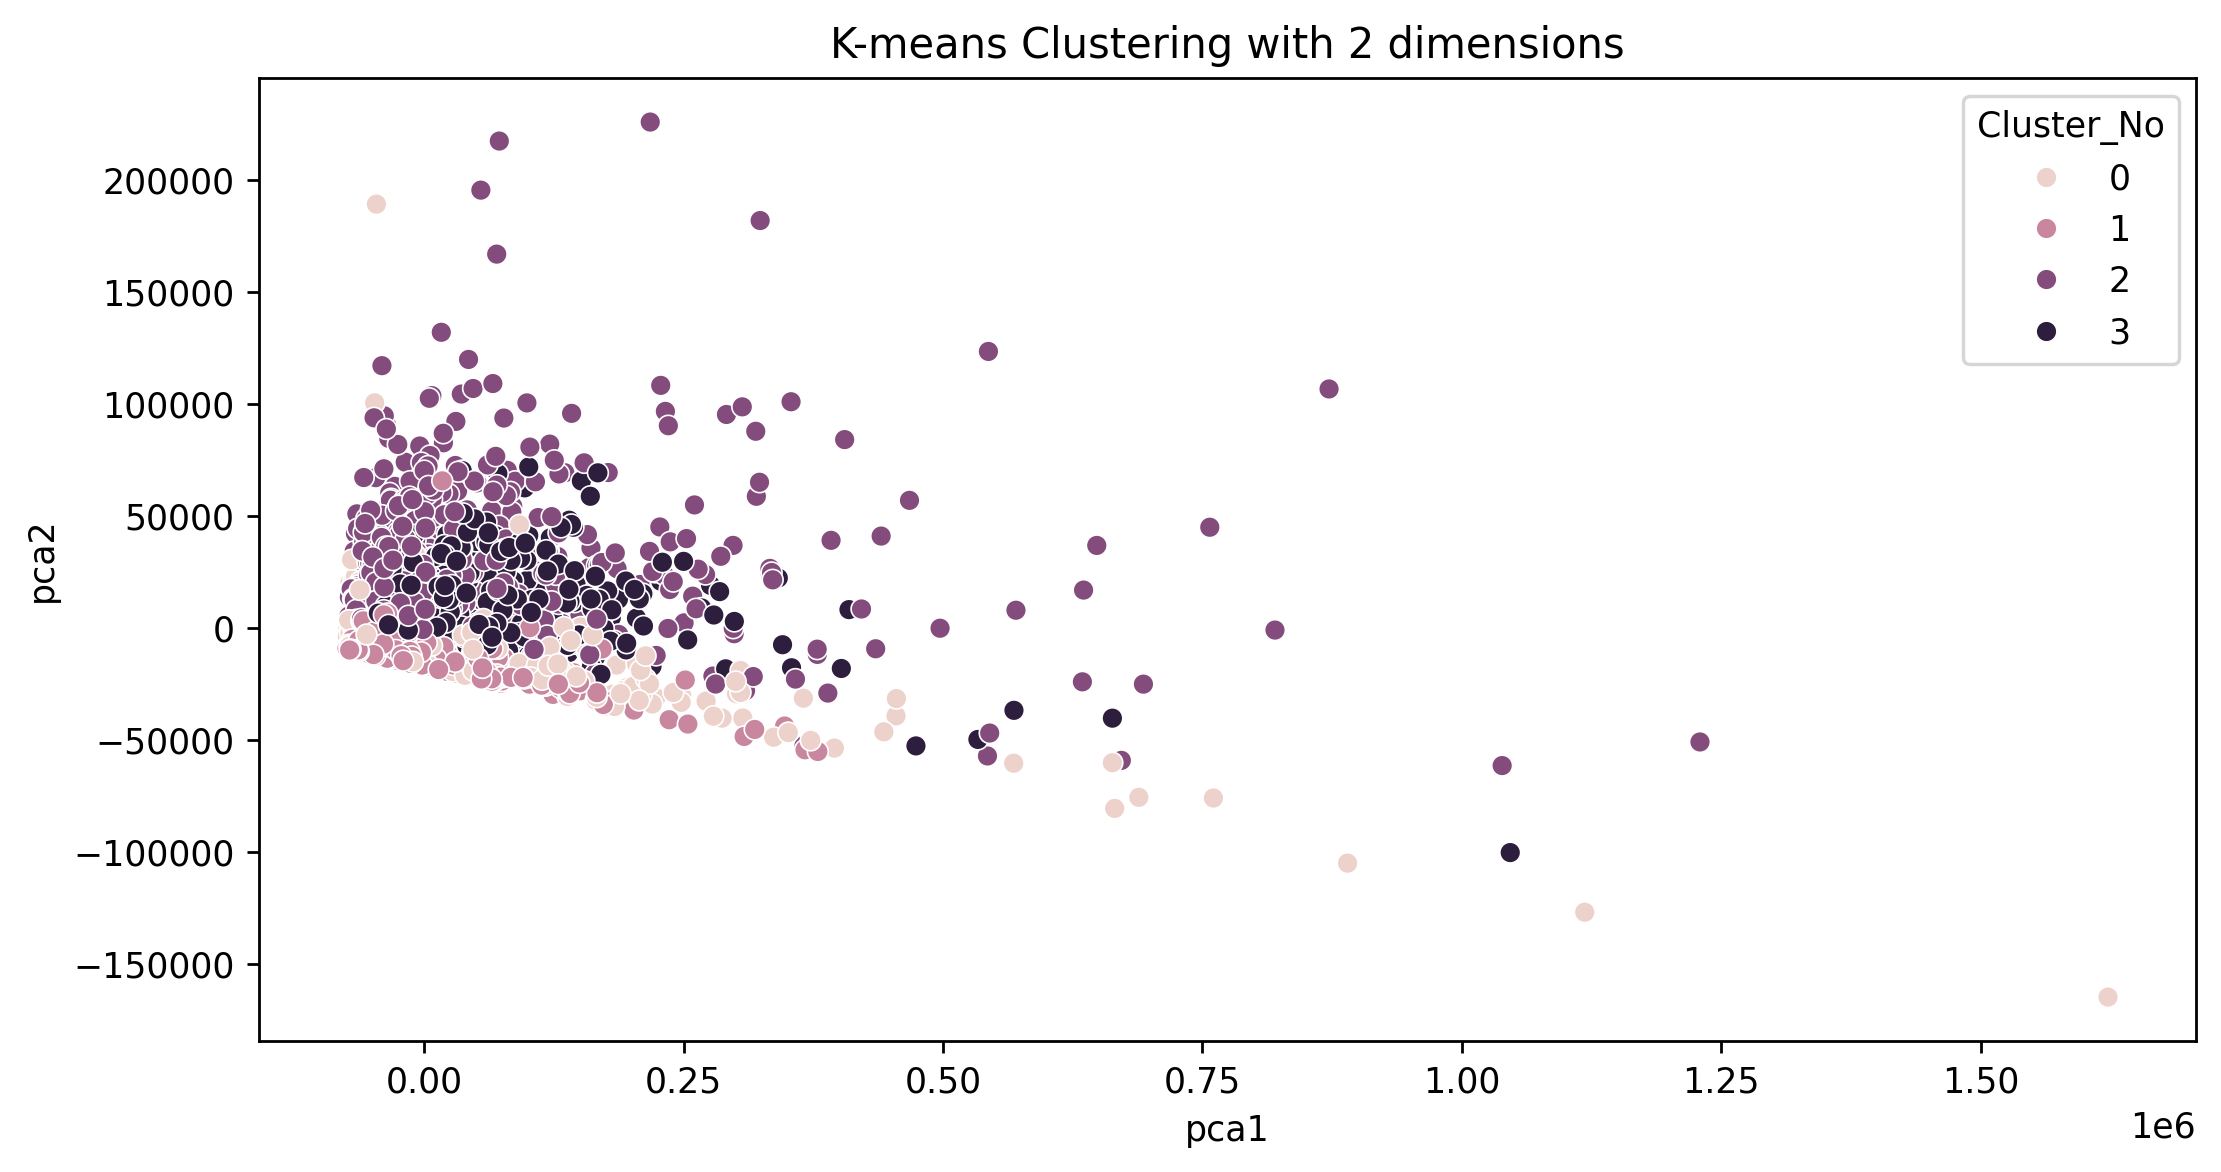

In [69]:
#Scatter diagram for 4 clusters using K-means
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(KM_airlines_4)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=KM_airlines_4['Cluster_No'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### CLuster analysis and Interpretation for K-Means
This partition method/ K-means method have some drawbacks like
1. We need to specify K value priorly
2. This algorithm is sensitive to noisy data

To overcome this difficulty we can use DBSCAN

## C) DBSCAN

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(airlines_data)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [127]:
db3 = DBSCAN(eps=1, min_samples=3)
y = db3.fit_predict(x)
y

array([0, 0, 0, ..., 1, 0, 0])

In [130]:
np.unique(y,return_counts=True)
# -1 : outliers
# 0 to 9: 10 clusters are there

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([ 508, 2338, 1105,   13,    4,    3,    3,    7,    5,    3,   10]))

In [131]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)
# Score is approximately near to zero. Clusters are overlapping

0.09390508562243595

Hyperparameter Tuning
1. Epsilon value


In [108]:
# Finding best eps value
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point
neighbor = NearestNeighbors(n_neighbors=3).fit(x)
# Calculate nearest 3 data points of each data point

In [109]:
d,index = neighbor.kneighbors(x)
# d : euclidean distance at
# index : which data point is close to which data point

In [110]:
neighbor.kneighbors(x)
# first data point is the core point with 3 minpts and other two are neighbors

(array([[0.        , 0.11184685, 0.12034246],
        [0.        , 0.11406276, 0.11437601],
        [0.        , 0.16540223, 0.19458949],
        ...,
        [0.        , 0.16614779, 0.28024323],
        [0.        , 0.25725534, 0.27167409],
        [0.        , 0.00270574, 0.0112955 ]]),
 array([[   0,  378,  363],
        [   1,    3,  363],
        [   2,  338,  368],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 3882],
        [3998, 3491, 3455]]))

In [111]:
# All rows with minimum distance to the other point - first nearest neighbor
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

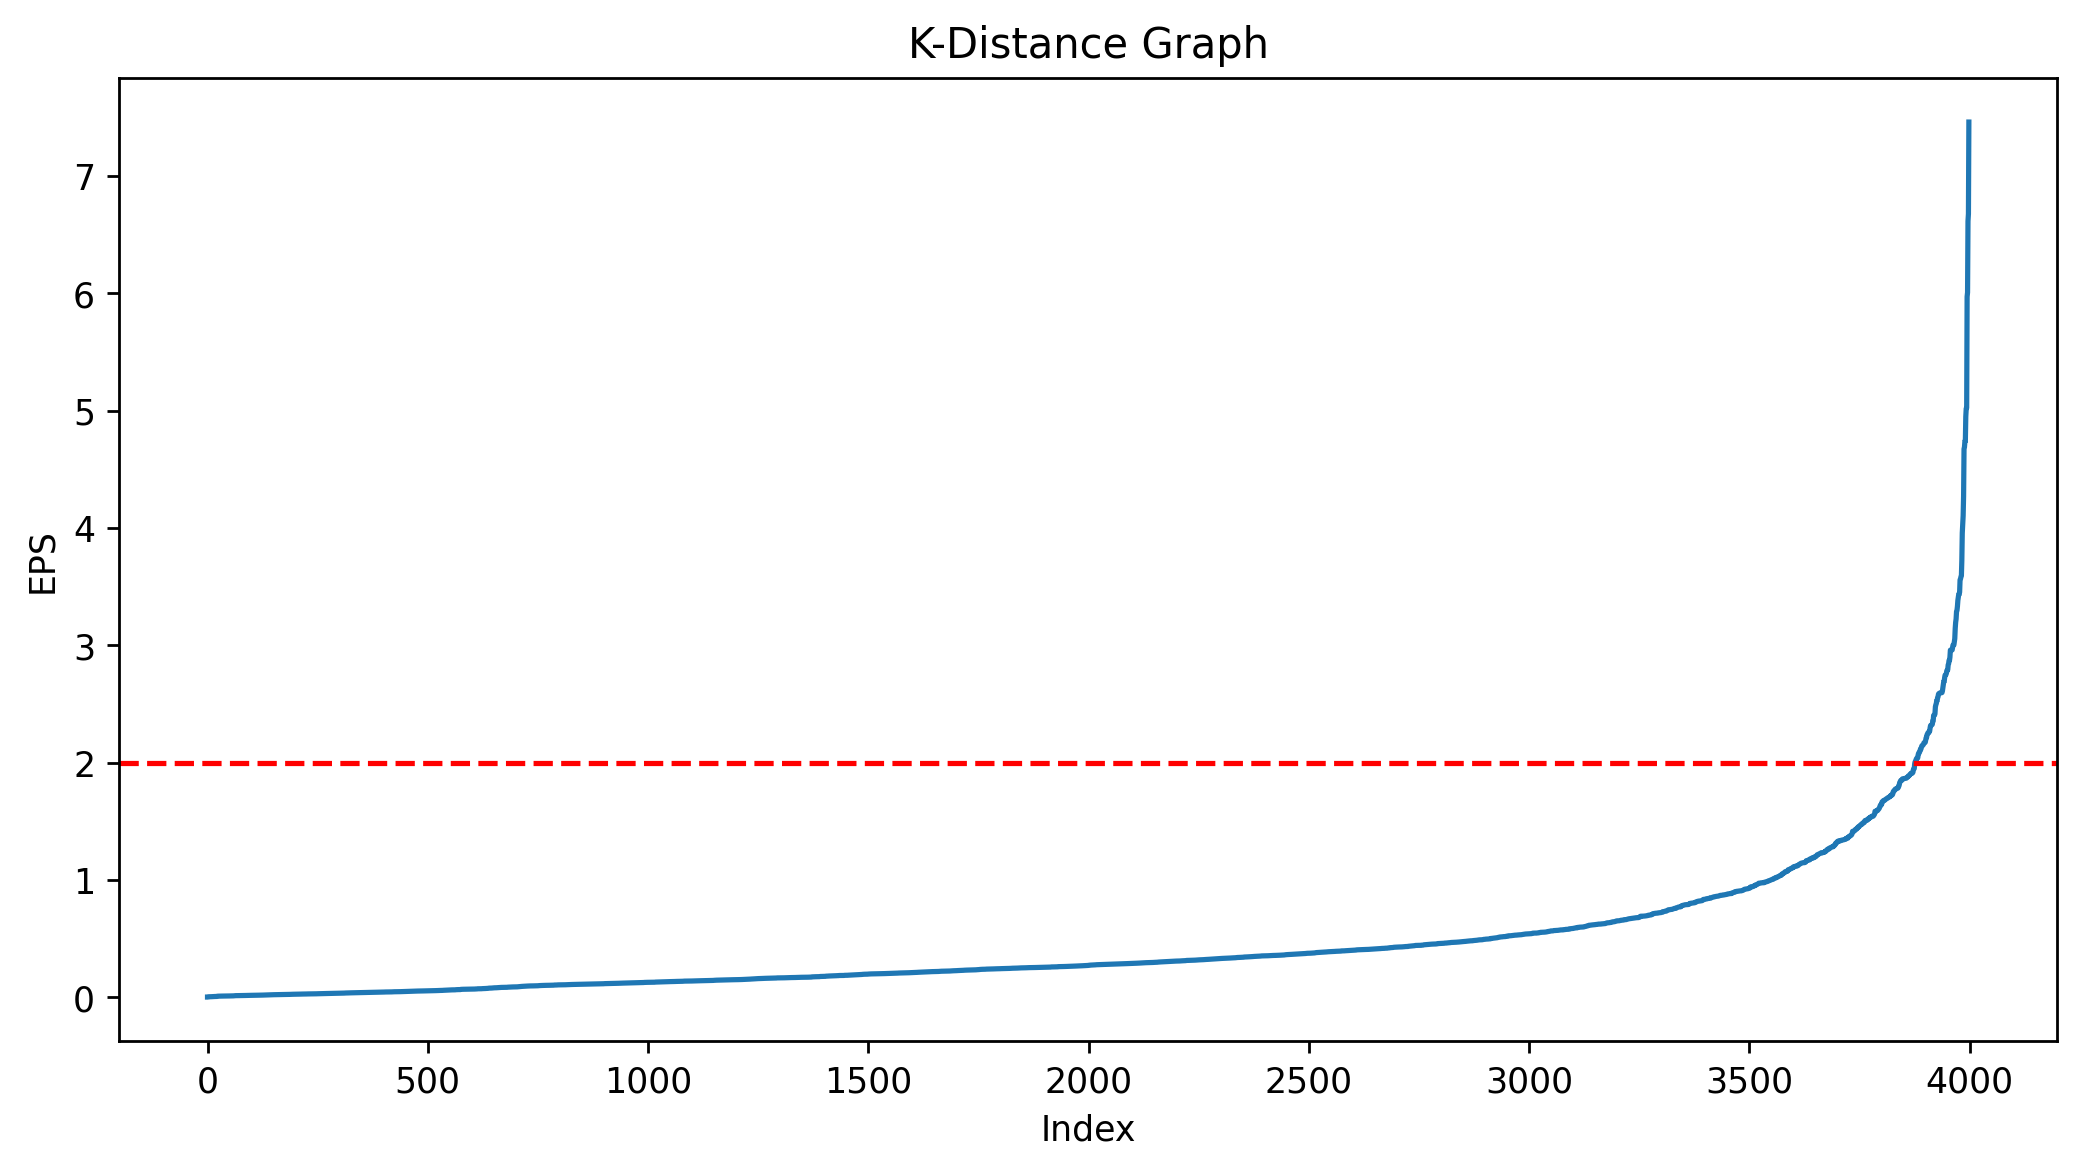

In [113]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color='red')
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')
# Epsilon value should be 0.15 to 0.2

### Evaluation and Performance Metrics for DBSCAN

Selecting Min_samples or MinPts:

1. Number of columns + 1 : 13+1=14
2. Number of columns*2 : 13$*$2 = 26
3. Always keep it at least 3

In [115]:
# For e=2 and minpts=14
db3 = DBSCAN(eps=2, min_samples=14)
y = db3.fit_predict(x)
silhouette_score(x,y)

0.2551564126067076

In [123]:
# For e=2 and minpts=26
db3 = DBSCAN(eps=2, min_samples=26)
y = db3.fit_predict(x)
silhouette_score(x,y)

0.25143019911087544

In [118]:
# For e=2 and minpts=3
db3 = DBSCAN(eps=2, min_samples=3)
y = db3.fit_predict(x)
silhouette_score(x,y)

0.2457363433586349

In [141]:
# for the min_samples = 14, the silhouette scroe is quite good
# For e=2 and minpts=14
db3 = DBSCAN(eps=2, min_samples=14)
y = db3.fit_predict(x)
Clusters_DBSCAN = pd.DataFrame(y, columns=['Cluster_No'])
DBSCAN_airlines = airlines.join(Clusters_DBSCAN)
DBSCAN_airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster_No  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          1           1  
...      ...         ...  
3994       1           1  
3995       1           1  
3996       1           1  
3997       0           0  
3998       0           0  

[3999 rows x 13 columns]

### Visualization

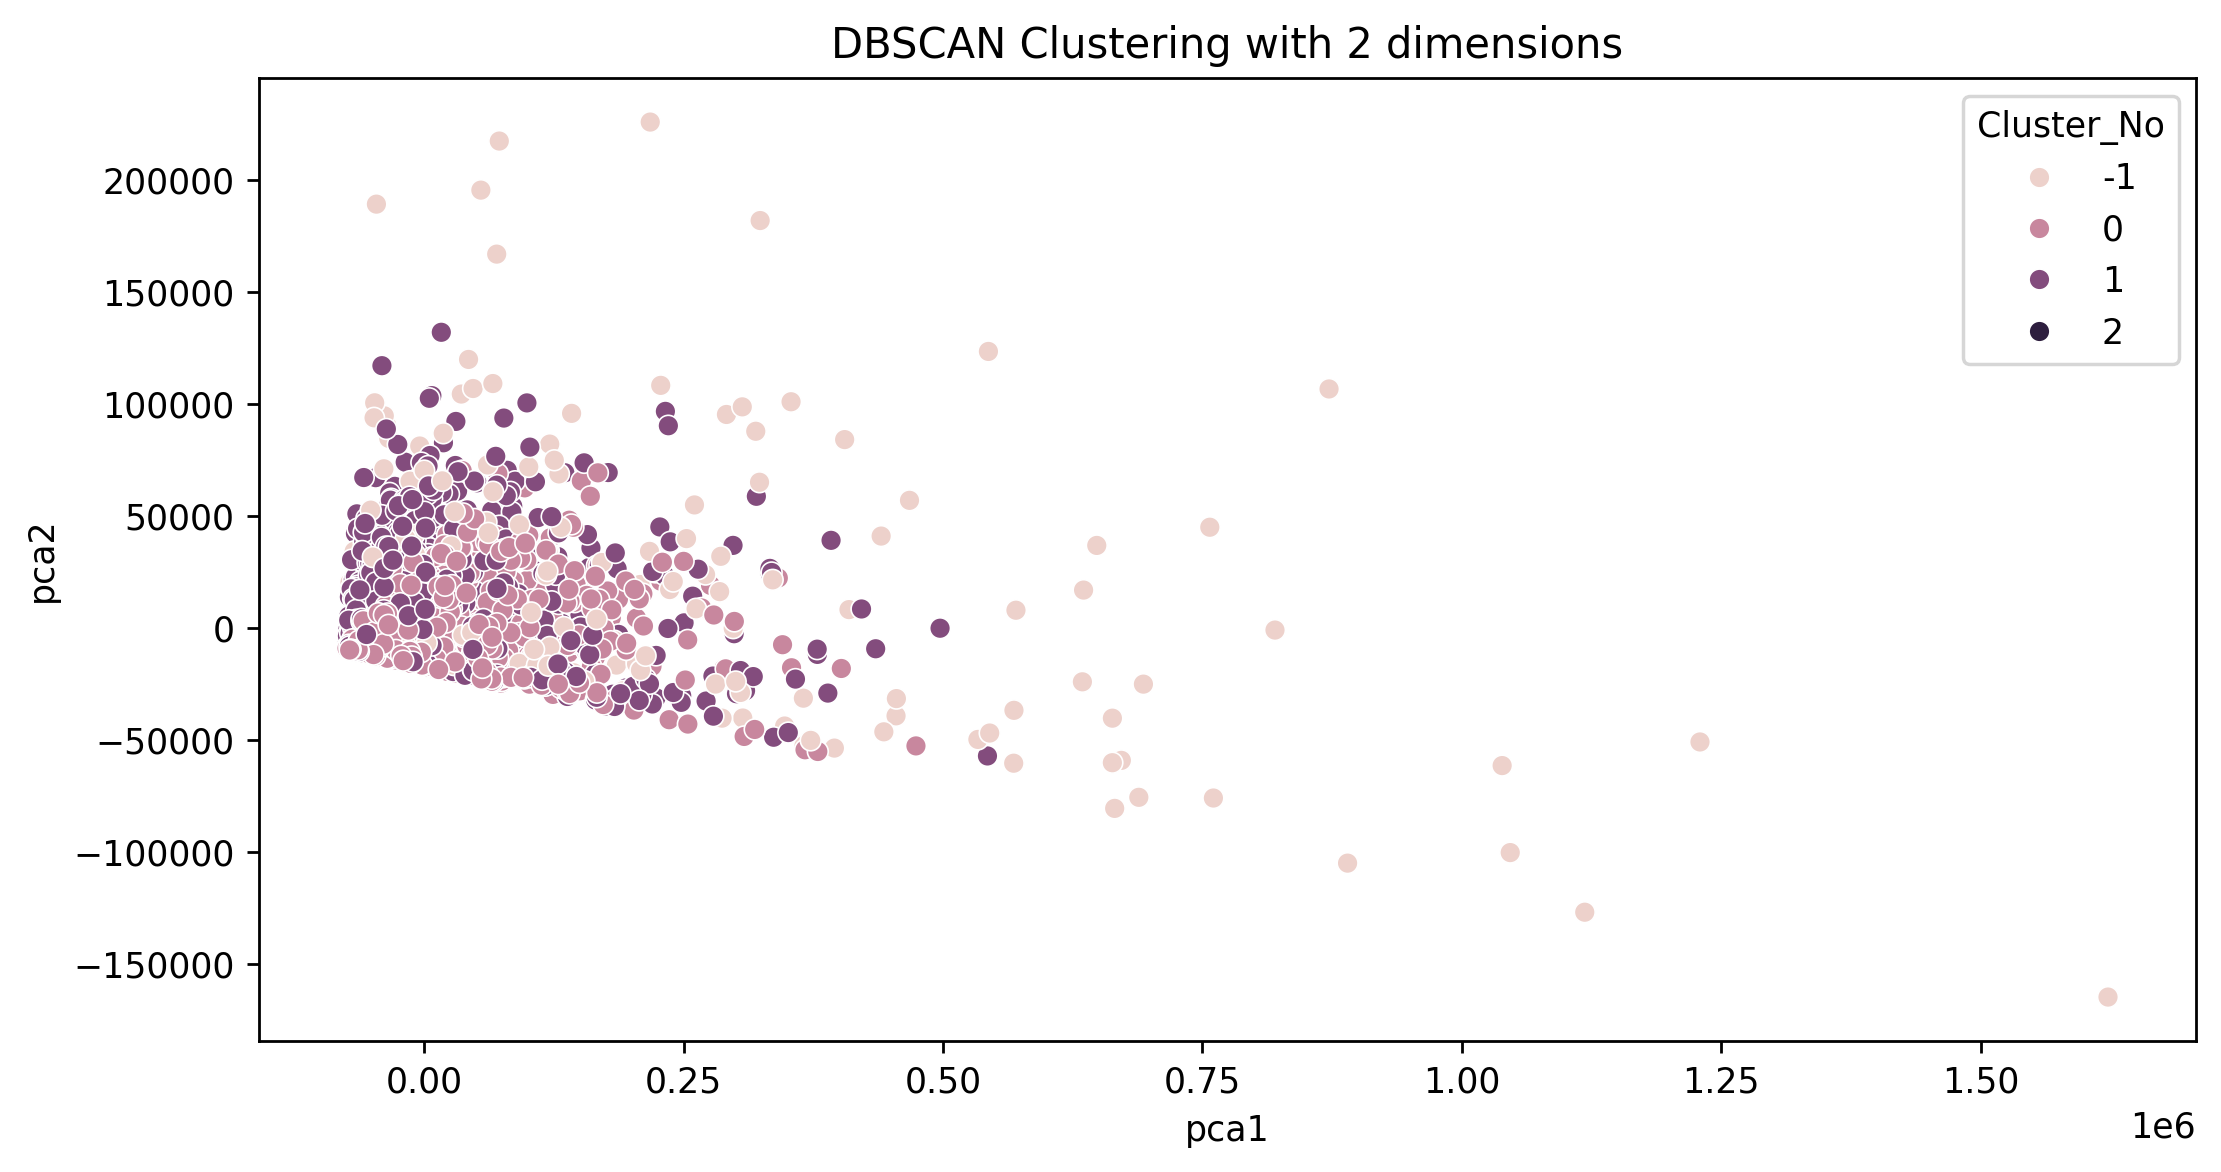

In [145]:
#Scatter diagram for 4 clusters using K-means
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(DBSCAN_airlines)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=DBSCAN_airlines['Cluster_No'], data=results)
plt.title('DBSCAN Clustering with 2 dimensions')
plt.show()

### Cluster Analysis and Interpretation
1. It is robust to noise, as it can identify points that do not belong to any cluster as outliers.
2. It does not require the number of clusters to be specified in advance.
3. Here the outliers are denoted with the '-1' numbers. and according the density of the clusters, the clusters are divided.